## 1) Plot all rmse results

Models used: GPT-2 (base), LSTM, DeepSeek-coder-7b, BERT-small
Saved to C:\Users\jacob\OneDrive\Documents\GitHub\external_data\nlp4neuro\results_april30\experiment_1\experiment1_rmse_sig_final.pdf


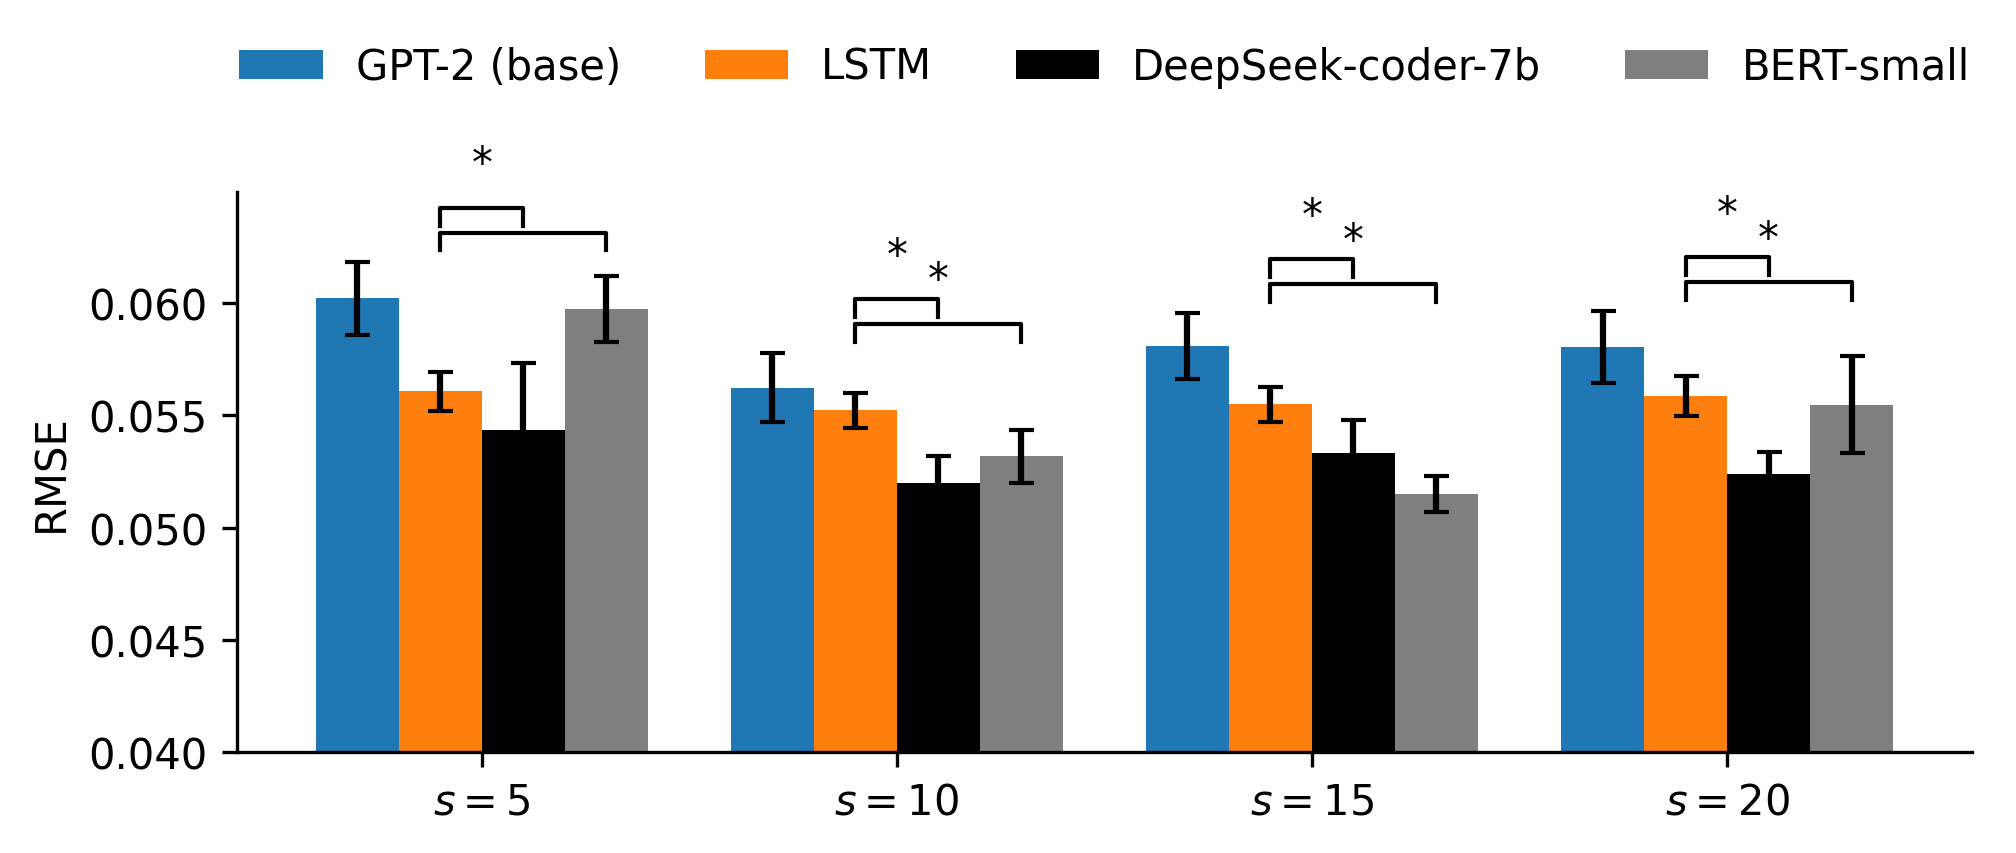

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu, sem

# 1) I/O settings
RESULTS_ROOT = os.path.abspath(
    os.path.join(os.getcwd(), os.pardir, os.pardir, os.pardir,
                 "external_data", "nlp4neuro", "results_april30", "experiment_1")
)
fish_list   = [9, 10, 11, 12, 13]
seq_lengths = [5, 10, 15, 20]
num_runs    = 10

# 2) Exact model names and mapping to file keys + colors
model_map = {
    "GPT-2 (base)":            ("gpt2_pretrained",   "#1f77b4"),
    "LSTM": ("lstm",              "#ff7f0e"),
    "DeepSeek-coder-7b":   ("deepseek_moe",      "#000000"),
    "BERT-small":   ("bert",              "#7f7f7f"),
}
model_names = list(model_map.keys())
print("Models used:", ", ".join(model_names))

# 3) Collect RMSEs
rmse_data = {m: {s: [] for s in seq_lengths} for m in model_names}

for fish in fish_list:
    gt_path = os.path.join(RESULTS_ROOT, f"fish{fish}", f"fish{fish}_final_predictions_groundtruth_test.npy")
    y_true  = np.load(gt_path)
    for run in range(1, num_runs+1):
        for seq in seq_lengths:
            seq_dir = os.path.join(RESULTS_ROOT, f"fish{fish}", f"run_{run}", f"seq_{seq}")
            if not os.path.isdir(seq_dir):
                continue
            for m in model_names:
                key = model_map[m][0]
                f   = os.path.join(seq_dir, f"fish{fish}_final_predictions_{key}_test_run{run}.npy")
                if os.path.isfile(f):
                    preds = np.load(f)
                    rmse  = np.sqrt(np.mean((preds - y_true)**2))
                    rmse_data[m][seq].append(rmse)

# 4) Compute means, SEMs, and p-values for LSTM vs BERT-small, DeepSeek
means, errs, pvals = {}, {}, {}
for m in model_names:
    means[m] = [np.mean(rmse_data[m][s]) for s in seq_lengths]
    errs[m]  = [sem(rmse_data[m][s])      for s in seq_lengths]

for seq in seq_lengths:
    lstm_vals = rmse_data["LSTM"][seq]
    pvals[seq] = {}
    for other in ["BERT-small", "DeepSeek-coder-7b"]:
        stat, p = mannwhitneyu(lstm_vals, rmse_data[other][seq], alternative="two-sided")
        pvals[seq][other] = p

# 5) Compute a per‐group base height for each sequence length
gap     = 0.0005
h       = 0.0008   # bracket vertical thickness
y_bases = [
    max(means[m][j] + errs[m][j] for m in model_names) + gap
    for j in range(len(seq_lengths))
]

# 6) Plot
plt.rcParams["pdf.fonttype"] = 42
fig, ax = plt.subplots(figsize=(7, 3), dpi=300)

x  = np.arange(len(seq_lengths))
bw = 0.8 / len(model_names)

for idx, m in enumerate(model_names):
    off = (idx - len(model_names)/2) * bw + bw/2
    ax.bar(x + off,
           means[m],
           width   = bw,
           yerr    = errs[m],
           capsize = 3,
           label   = m,
           color   = model_map[m][1])

ax.set_ylim(0.04, None)
ax.set_ylabel("RMSE")
ax.set_xticks(x)
ax.set_xticklabels([f"$s={s}$" for s in seq_lengths])
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

ax.legend(ncol=len(model_names),
          frameon=False,
          bbox_to_anchor=(0, 1.12, 1, 0),
          loc="lower center")

def draw_bracket(x1, x2, y, h, p):
    # draw the little “┏━┓” bracket
    ax.plot([x1, x1, x2, x2],
            [y, y+h, y+h, y],
            lw=1, c="k")
    # star at exact midpoint
    if p < 0.05:
        ax.text((x1 + x2) / 2,
                y + h + 0.001,
                "*",
                ha="center",
                va="bottom",
                fontsize=10)

for j, seq in enumerate(seq_lengths):
    # get the baseline height for this sequence
    y_base = y_bases[j]

    # compute each bar’s center x‐position
    idx_l = model_names.index("LSTM")
    idx_b = model_names.index("BERT-small")
    idx_d = model_names.index("DeepSeek-coder-7b")

    x_l = x[j] + ((idx_l - len(model_names)/2) * bw + bw/2)
    x_b = x[j] + ((idx_b - len(model_names)/2) * bw + bw/2)
    x_d = x[j] + ((idx_d - len(model_names)/2) * bw + bw/2)

    # draw the two comparisons, using the same y_base so stars are equally high
    draw_bracket(x_l, x_b, y_base,        h, pvals[seq]["BERT-small"])
    draw_bracket(x_l, x_d, y_base + h + 0.0003, h, pvals[seq]["DeepSeek-coder-7b"])

plt.tight_layout()
out_file = os.path.join(RESULTS_ROOT, "experiment1_rmse_sig_final.pdf")
plt.savefig(out_file, dpi=300, bbox_inches="tight")
print("Saved to", out_file)


C:\Users\jacob\AppData\Local\Temp\ipykernel_22560\3963392535.py:170: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Saved to C:\Users\jacob\OneDrive\Documents\GitHub\external_data\nlp4neuro\results_april30\experiment_1\experiment1_rmse_sig_final.pdf


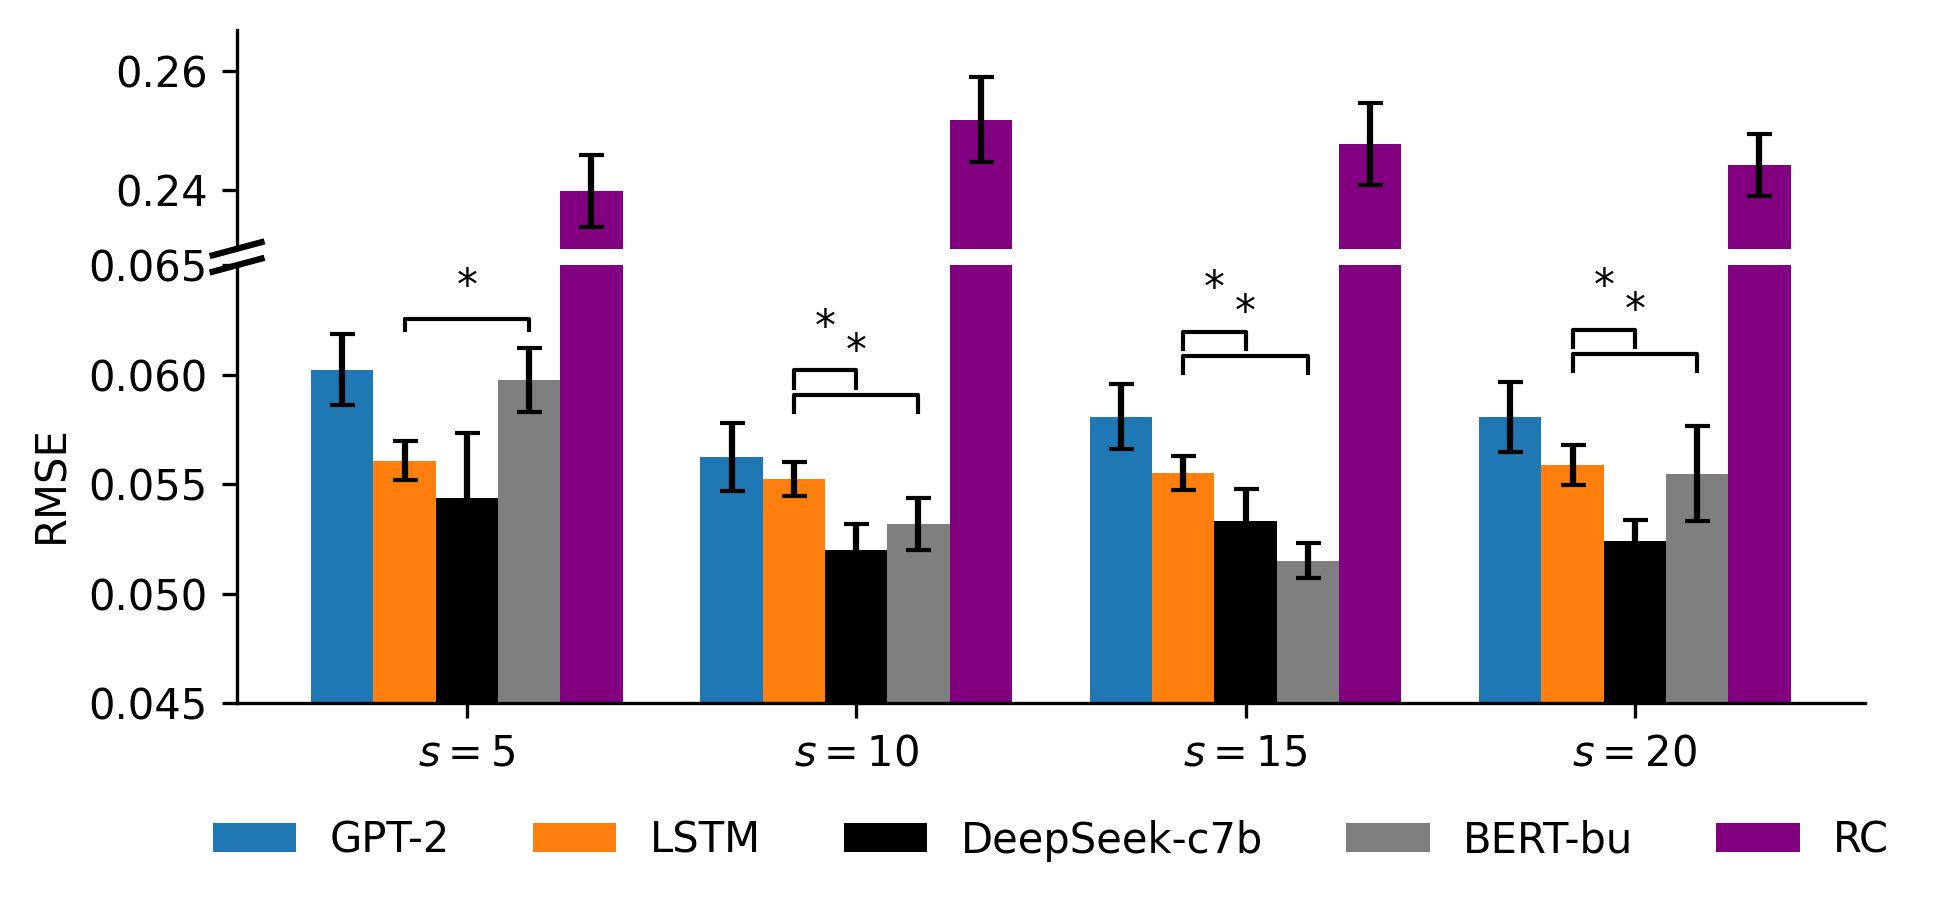

In [47]:
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu, sem

# 1) I/O settings
RESULTS_ROOT = os.path.abspath(
    os.path.join(os.getcwd(), os.pardir, os.pardir, os.pardir,
                 "external_data", "nlp4neuro", "results_april30", "experiment_1")
)
fish_list   = [9, 10, 11, 12, 13]
seq_lengths = [5, 10, 15, 20]
num_runs    = 10

# 2) Model → (file-key, color, legend label)
model_map = {
    "GPT-2 (base)":        ("gpt2_pretrained", "#1f77b4", "GPT-2"),
    "LSTM":                ("lstm",            "#ff7f0e", "LSTM"),
    "DeepSeek-coder-7b":   ("deepseek_moe",    "#000000", "DeepSeek-c7b"),
    "BERT-small":          ("bert",            "#7f7f7f", "BERT-bu"),
    "RC":                  ("reservoir",       "purple",  "RC"),
}
model_names = list(model_map.keys())

# 3) Gather RMSEs
rmse_data = {m:{s:[] for s in seq_lengths} for m in model_names}
for fish in fish_list:
    y_true = np.load(os.path.join(
        RESULTS_ROOT, f"fish{fish}",
        f"fish{fish}_final_predictions_groundtruth_test.npy"
    ))
    for run in range(1, num_runs+1):
        for s in seq_lengths:
            d = os.path.join(RESULTS_ROOT, f"fish{fish}", f"run_{run}", f"seq_{s}")
            if not os.path.isdir(d): continue
            for m in model_names:
                key = model_map[m][0]
                fp  = os.path.join(d, f"fish{fish}_final_predictions_{key}_test_run{run}.npy")
                if os.path.isfile(fp):
                    preds = np.load(fp)
                    rmse_data[m][s].append(np.sqrt(np.mean((preds - y_true)**2)))

# 4) Compute means, SEMs, p-values
means, errs, pvals = {}, {}, {}
for m in model_names:
    means[m] = [np.mean(rmse_data[m][s]) for s in seq_lengths]
    errs[m]  = [sem   (rmse_data[m][s]) for s in seq_lengths]

for s in seq_lengths:
    lst = rmse_data["LSTM"][s]
    pvals[s] = {
        "BERT-small":        mannwhitneyu(lst, rmse_data["BERT-small"][s])[1],
        "DeepSeek-coder-7b": mannwhitneyu(lst, rmse_data["DeepSeek-coder-7b"][s])[1],
    }

# 5) Plot with a broken y-axis
plt.rcParams["pdf.fonttype"] = 42
fig, (ax_hi, ax_lo) = plt.subplots(
    2, 1, sharex=True,
    figsize=(7, 3.4), dpi=300,
    gridspec_kw={"height_ratios": [1, 2], "hspace": 0.05}
)

x  = np.arange(len(seq_lengths))
bw = 0.8 / len(model_names)

for i, m in enumerate(model_names):
    off = (i - len(model_names)/2) * bw + bw/2
    col, lbl = model_map[m][1], model_map[m][2]

    # draw all bars on lower
    ax_lo.bar(
        x + off,
        means[m],
        width=bw,
        yerr=errs[m] if m!="RC" else None,
        capsize=3    if m!="RC" else 0,
        color=col,
        label=lbl
    )
    # draw RC again on upper (with errorbar)
    if m == "RC":
        ax_hi.bar(
            x + off,
            means[m],
            width=bw,
            yerr=errs[m],
            capsize=3,
            color=col,
            label="_nolegend_"
        )

ax_lo.set_ylim(0.045, 0.065)
ax_hi.set_ylim(0.23, max(means["RC"]) + errs["RC"][-1] + 0.01)

for ax in (ax_hi, ax_lo):
    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)
ax_hi.spines["bottom"].set_visible(False)
ax_hi.tick_params(axis='x', bottom=False, labelbottom=False)

# “//” break marks
d = 0.015
ax_lo.plot((-d, +d), (1-d, 1+d), transform=ax_lo.transAxes, color="k", clip_on=False)
ax_hi.plot((-d, +d), (-2*d, +2*d), transform=ax_hi.transAxes, color="k", clip_on=False)

ax_lo.set_ylabel("RMSE")
ax_lo.set_xticks(x)
ax_lo.set_xticklabels([f"$s={s}$" for s in seq_lengths])

# —– PARAMETERS for significance brackets —–
sig_gap      = 0.0005   # default vertical offset above bars
sig_hgt      = 0.0008   # default bracket height
sig_star_off = 0.001    # default star offset
sig_between  = 0.0003   # gap between lower & upper brackets

# overrides for s=5 only
sig_overrides = {
    5: dict(gap=0.0002, h=0.0005, star_off=0.0005)
}

# updated draw_bracket with an `always` flag
def draw_bracket(ax, x1, x2, y, h, p,
                 star_off=sig_star_off, always=False):
    if always or p < 0.05:
        ax.plot([x1, x1, x2, x2], [y, y+h, y+h, y],
                lw=1, c="k")
        ax.text((x1+x2)/2, y+h+star_off,
                "*", ha="center", va="bottom", fontsize=10)

# pre-compute indices
iL = model_names.index("LSTM")
iB = model_names.index("BERT-small")
iD = model_names.index("DeepSeek-coder-7b")

# draw the brackets
for j, s in enumerate(seq_lengths):
    params = sig_overrides.get(s,
                dict(gap=sig_gap, h=sig_hgt, star_off=sig_star_off))
    y0 = max(means[m][j] + errs[m][j]
             for m in model_names if m!="RC") + params["gap"]
    y0 = min(y0, ax_lo.get_ylim()[1] - params["h"] - 0.0002)

    xL = x[j] + ((iL - len(model_names)/2)*bw + bw/2)
    xB = x[j] + ((iB - len(model_names)/2)*bw + bw/2)
    xD = x[j] + ((iD - len(model_names)/2)*bw + bw/2)

    if s == 5:
        # force draw for s=5
        draw_bracket(ax_lo, xL, xB, y0,
                     params["h"], pvals[s]["BERT-small"],
                     star_off=params["star_off"],
                     always=True)
    else:
        # lower: LSTM vs BERT
        draw_bracket(ax_lo, xL, xB, y0,
                     params["h"], pvals[s]["BERT-small"])
        # upper: LSTM vs DeepSeek
        draw_bracket(ax_lo, xL, xD,
                     y0 + params["h"] + sig_between,
                     params["h"], pvals[s]["DeepSeek-coder-7b"])

# legend below
ax_lo.legend(ncol=len(model_names), frameon=False,
             loc="upper center", bbox_to_anchor=(0.5, -0.18))
plt.subplots_adjust(bottom=0.22)

out_file = os.path.join(RESULTS_ROOT,
                        "experiment1_rmse_sig_final.pdf")
plt.tight_layout()
plt.savefig(out_file, bbox_inches="tight")
print("Saved to", out_file)


## 2) Plot pre- vs un-trained

Saved to C:\Users\jacob\OneDrive\Documents\GitHub\external_data\nlp4neuro\results_april30\experiment_2\pretrained_vs_untrained_exp1_exp2.pdf


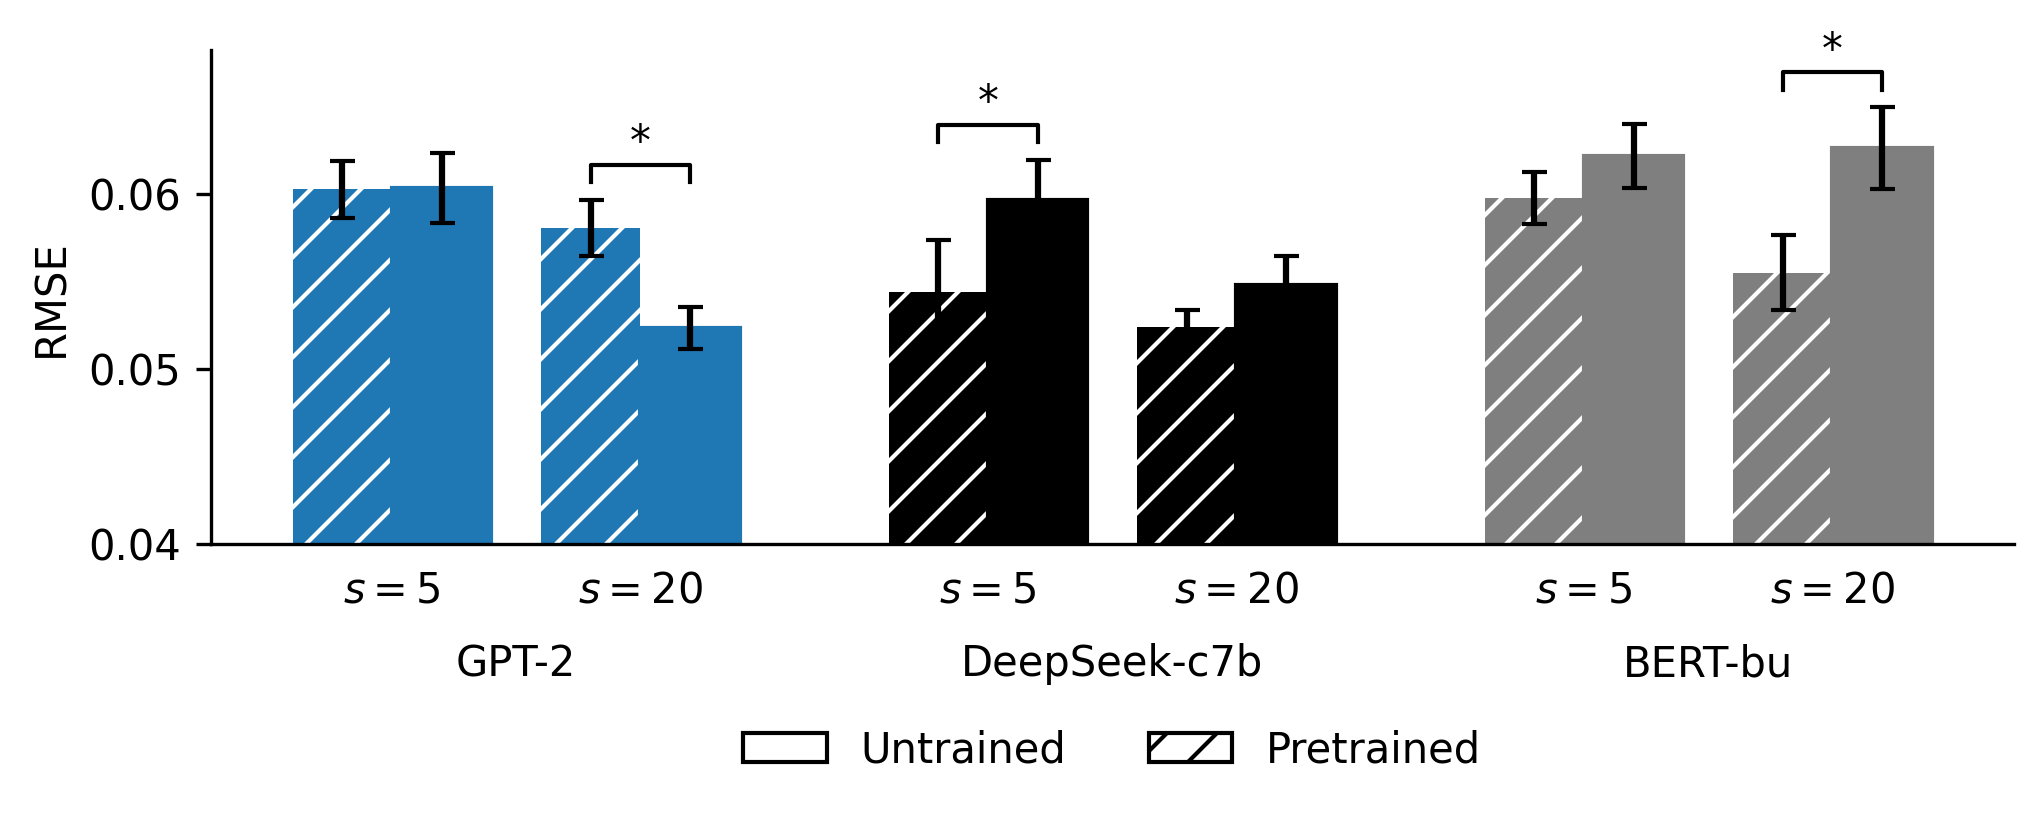

In [62]:
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import sem, wilcoxon
import matplotlib.patches as mpatches

# ----------------------------------------------------------
# 0) paths / constants
# ----------------------------------------------------------
EXP1_ROOT = os.path.abspath(
    os.path.join(os.getcwd(), os.pardir, os.pardir, os.pardir,
                 "external_data", "nlp4neuro", "results_april30", "experiment_1")
)
EXP2_ROOT = os.path.abspath(
    os.path.join(os.getcwd(), os.pardir, os.pardir, os.pardir,
                 "external_data", "nlp4neuro", "results_april30", "experiment_2")
)
fish_list   = [9, 10, 11, 12, 13]
seq_lengths = [5, 20]
model_info  = {
    "GPT-2 (base)"      : dict(pre_key="gpt2_pretrained",  stub="GPT2",     c="#1f77b4"),
    "DeepSeek-coder-7b" : dict(pre_key="deepseek_moe",      stub="DeepSeek", c="#000000"),
    "BERT-small"        : dict(pre_key="bert",             stub="BERT",     c="#7f7f7f"),
}
states = {"prtr":"Pretrained", "untr":"Untrained"}

# ----------------------------------------------------------
# 1) ground-truth loader
# ----------------------------------------------------------
def load_gt(fid):
    for root in (EXP1_ROOT, EXP2_ROOT):
        for cand in (f"fish{fid}_test_groundtruth.npy",
                     f"fish{fid}_groundtruth_test.npy"):
            fp = os.path.join(root, cand)
            if os.path.isfile(fp):
                return np.load(fp)
        sub = os.path.join(root, f"fish{fid}")
        for cand in (f"fish{fid}_test_groundtruth.npy",
                     f"fish{fid}_groundtruth_test.npy"):
            fp = os.path.join(sub, cand)
            if os.path.isfile(fp):
                return np.load(fp)
    raise FileNotFoundError(f"GT fish{fid}")

# ----------------------------------------------------------
# 2) collect RMSEs
# ----------------------------------------------------------
rmse = {s:{m:{st:[] for st in states} for m in model_info} for s in seq_lengths}

for fish in fish_list:
    y_true = load_gt(fish)
    # pre-trained from exp1
    for run in range(1,11):
        for s in seq_lengths:
            seq_dir = os.path.join(EXP1_ROOT, f"fish{fish}", f"run_{run}", f"seq_{s}")
            if not os.path.isdir(seq_dir): continue
            for m,meta in model_info.items():
                f = os.path.join(seq_dir,
                     f"fish{fish}_final_predictions_{meta['pre_key']}_test_run{run}.npy")
                if os.path.isfile(f):
                    preds = np.load(f)
                    rmse_val = np.sqrt(np.mean((preds - y_true)**2))
                    rmse[s][m]["prtr"].append(rmse_val)
    # un-trained from exp2
    for run in range(1,11):
        for s in seq_lengths:
            for m,meta in model_info.items():
                f = os.path.join(EXP2_ROOT,
                     f"fish{fish}_model_{meta['stub']}_Untrained_run{run}_seq{s}_test_preds.npy")
                if os.path.isfile(f):
                    preds = np.load(f)
                    rmse_val = np.sqrt(np.mean((preds - y_true)**2))
                    rmse[s][m]["untr"].append(rmse_val)

# ----------------------------------------------------------
# 3) compute means, sem, p-values
# ----------------------------------------------------------
means, errs, pvals = {}, {}, {}
for s in seq_lengths:
    means[s], errs[s], pvals[s] = {}, {}, {}
    for m in model_info:
        a = np.array(rmse[s][m]["prtr"])
        b = np.array(rmse[s][m]["untr"])
        means[s][(m,"prtr")] = a.mean() if len(a)>0 else np.nan
        errs [s][(m,"prtr")] = sem(a) if len(a)>1 else 0
        means[s][(m,"untr")] = b.mean() if len(b)>0 else np.nan
        errs [s][(m,"untr")] = sem(b) if len(b)>1 else 0
        if len(a)==len(b) and len(a)>0:
            pvals[s][m] = wilcoxon(a, b).pvalue
        else:
            pvals[s][m] = np.nan

# ----------------------------------------------------------
# 4) plotting
# ----------------------------------------------------------
plt.rcParams["pdf.fonttype"] = 42
fig, ax = plt.subplots(figsize=(7,3), dpi=300)

bw      = 0.2
gap     = 0.05
offsets = (np.array([-1.5,-0.5,0.5,1.5]) * bw +
           np.array([-gap,-gap, gap, gap]))
model_names = list(model_info.keys())
centers     = np.arange(len(model_names)) * ((offsets.max() - offsets.min()) + 0.5)

seen = set()
for i, m in enumerate(model_names):
    center = centers[i]
    for j, s in enumerate(seq_lengths):
        for k, st in enumerate(["prtr","untr"]):
            x   = center + offsets[j*2 + k]
            val = means[s][(m,st)]
            err = errs[s][(m,st)]
            if np.isnan(val): 
                continue
            col = model_info[m]["c"]
            if st == "untr":
                hatch, edgec, lw = "", col, 1
            else:
                hatch, edgec, lw = "//", "white", 0
            label = None
            if (m, st) not in seen:
                label = f"{m} {states[st]}"
                seen.add((m, st))
            ax.bar(x, val, yerr=err, width=bw,
                   color=col, edgecolor=edgec, linewidth=lw,
                   hatch=hatch, capsize=3, label=label)

# ─── custom x-axis labels (two lines), using short_names ───
ax.set_xticks([])

for i, m in enumerate(model_names):
    center = centers[i]

    # your existing s=5 and s=20 annotations
    ax.text(center + offsets[:2].mean(), -0.05, r"$s=5$",  ha="center", va="top",
            transform=ax.get_xaxis_transform())
    ax.text(center + offsets[2:].mean(), -0.05, r"$s=20$", ha="center", va="top",
            transform=ax.get_xaxis_transform())

    # replace `m` with the shortened name
    ax.text(center, -0.20, short_names[m], ha="center", va="top",
            transform=ax.get_xaxis_transform())


ax.set_ylabel("RMSE")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.set_ylim(0.04, None)

# ----------------------------------------------------------
# 5) custom legend: style (solid vs hatch) + model colors
# ----------------------------------------------------------
import matplotlib.patches as mpatches

# create just the two style handles
style_handles = [
    mpatches.Patch(facecolor='white', edgecolor='black',        label='Untrained'),
    mpatches.Patch(facecolor='white', edgecolor='black', hatch='//', label='Pretrained')
]

# draw that one‐row legend underneath
ax.legend(
    style_handles,
    [h.get_label() for h in style_handles],
    ncol=2,
    frameon=False,
    bbox_to_anchor=(0.5, -0.3),   # move down below the axes
    loc='upper center'
)


# style_handles = [
#     mpatches.Patch(facecolor='white', edgecolor='black', hatch='//', label='Pretrained'),
#     mpatches.Patch(facecolor='white', edgecolor='black',        label='Untrained')
# ]
# short_names = {
#     "GPT-2 (base)"      : "GPT-2",
#     "DeepSeek-coder-7b" : "DeepSeek-c7b",
#     "BERT-small"        : "BERT-bu"
# }
# model_handles = [
#     mpatches.Patch(facecolor=meta['c'], edgecolor='none', label=short_names[m])
#     for m, meta in model_info.items()
# ]
# all_handles = style_handles + model_handles
# all_labels  = [h.get_label()    for h in all_handles]

# ax.legend(
#     all_handles, all_labels,
#     ncol=len(all_handles),
#     frameon=False,
#     bbox_to_anchor=(0.5, -0.25),
#     loc='upper center'
# )

# ----------------------------------------------------------
# 6) significance brackets
# ----------------------------------------------------------
def bracket(x1, x2, y, h):
    ax.plot([x1, x1, x2, x2], [y, y+h, y+h, y], c="k", lw=1)
    ax.text((x1+x2)/2, y + h*1.05, "*", ha="center", va="bottom")

h_br = 0.001
for i, m in enumerate(model_names):
    center = centers[i]
    for j, s in enumerate(seq_lengths):
        if pvals[s][m] < 0.05:
            top = max(
                means[s][(m,"prtr")] + errs[s][(m,"prtr")],
                means[s][(m,"untr")] + errs[s][(m,"untr")]
            )
            x1 = center + offsets[j*2]
            x2 = center + offsets[j*2 + 1]
            bracket(x1, x2, top + h_br, h_br)

plt.tight_layout()

outfile = os.path.join(EXP2_ROOT, "pretrained_vs_untrained_exp1_exp2.pdf")
plt.savefig(outfile, dpi=300, transparent=True, bbox_inches="tight")
print("Saved to", outfile)


# 3) Compare embedding strategies

In [ ]:
# bert base uncased


Pairwise Wilcoxon signed-rank p-values (pooled across models):
Vanilla      vs Positional  : p = 4.5216e-01
Vanilla      vs RelativePos : p = 3.5988e-01
Vanilla      vs Sparse      : p = 6.4083e-01
Vanilla      vs Spectral    : p = 5.4253e-01
Positional   vs RelativePos : p = 8.7121e-01
Positional   vs Sparse      : p = 1.7060e-01
Positional   vs Spectral    : p = 8.0783e-01
RelativePos  vs Sparse      : p = 3.3874e-01
RelativePos  vs Spectral    : p = 6.1201e-01
Sparse       vs Spectral    : p = 5.8376e-01
Saved plot to: C:\Users\jacob\OneDrive\Documents\GitHub\external_data\nlp4neuro\results_april30\experiment3_results\final_plots_and_stats\embeddings_pooled_models.pdf


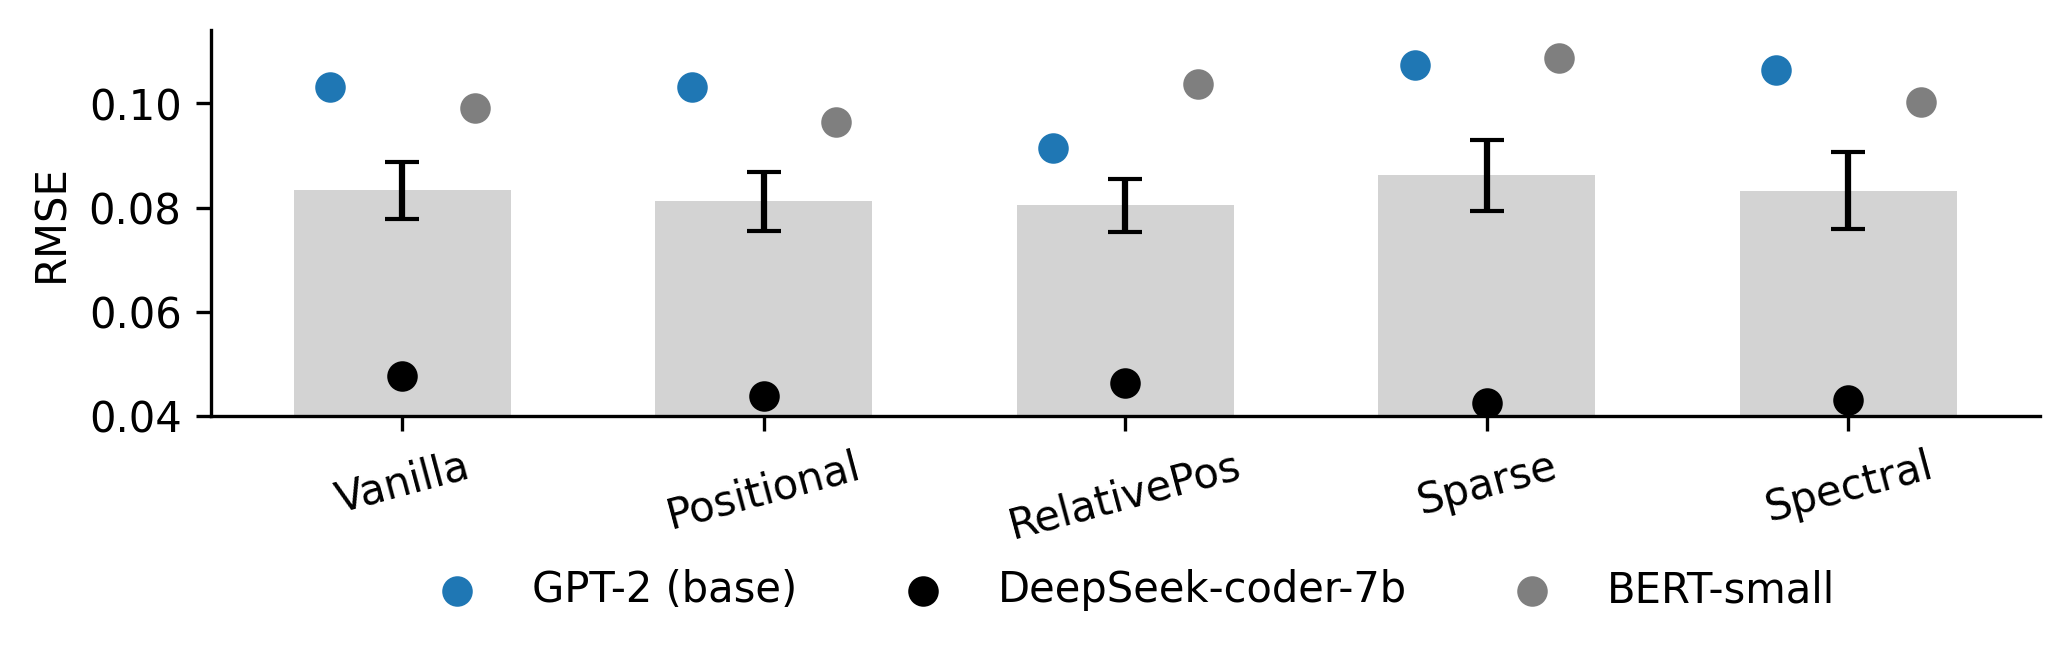

In [5]:
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import sem, wilcoxon

# ---------------------------------------------------------------------
# 0) paths, names, colours
# ---------------------------------------------------------------------
ROOT = os.path.abspath(
    os.path.join(os.getcwd(), os.pardir, os.pardir, os.pardir,
                 "external_data", "nlp4neuro", "results_april30",
                 "experiment3_results")
)
RUNS       = range(1, 11)
EMB_STRATS = ["Vanilla", "Positional", "RelativePos", "Sparse", "Spectral"]
MODEL_INFO = {
    "GPT-2 (base)"      : {"stub":"gpt2",     "c":"#1f77b4"},
    "DeepSeek-coder-7b" : {"stub":"deepseek", "c":"#000000"},
    "BERT-small"        : {"stub":"bert",     "c":"#7f7f7f"},
}

# ---------------------------------------------------------------------
# 1) load ground truth
# ---------------------------------------------------------------------
for gt in ("final_predictions_groundtruth_test.npy","groundtruth_test.npy"):
    fp = os.path.join(ROOT, gt)
    if os.path.isfile(fp):
        y_true = np.load(fp)
        break
else:
    raise FileNotFoundError("ground-truth test array not found")

# ---------------------------------------------------------------------
# 2) gather RMSEs per embedding, per model
# ---------------------------------------------------------------------
rmse = {emb: {m: [] for m in MODEL_INFO} for emb in EMB_STRATS}

for run in RUNS:
    run_dir = os.path.join(ROOT, f"run_{run}")
    if not os.path.isdir(run_dir): 
        continue
    for m, info in MODEL_INFO.items():
        fam_dir = os.path.join(run_dir, f"{info['stub']}_embedding_comparisons")
        for emb in EMB_STRATS:
            pred_fp = os.path.join(
                fam_dir,
                emb.lower(),
                f"{info['stub']}_{emb.lower()}_preds_run{run}.npy"
            )
            if os.path.isfile(pred_fp):
                preds = np.load(pred_fp)
                rmse_val = np.sqrt(np.mean((preds - y_true)**2))
                rmse[emb][m].append(rmse_val)

# ---------------------------------------------------------------------
# 3) pool across models for each embedding
# ---------------------------------------------------------------------
pooled = {emb: np.concatenate([rmse[emb][m] for m in MODEL_INFO]) for emb in EMB_STRATS}

# compute pooled means and SEMs
pooled_means = {emb: pooled[emb].mean() for emb in EMB_STRATS}
pooled_sems  = {emb: sem(pooled[emb])       for emb in EMB_STRATS}

# compute model-specific means per embedding
model_means = {
    emb: {m: np.mean(rmse[emb][m]) for m in MODEL_INFO}
    for emb in EMB_STRATS
}

# ---------------------------------------------------------------------
# 4) plot bars + staggered circles
# ---------------------------------------------------------------------
plt.rcParams["pdf.fonttype"] = 42
fig, ax = plt.subplots(figsize=(7, 2.5), dpi=300)

x = np.arange(len(EMB_STRATS))
bw = 0.6
# draw pooled bars
ax.bar(x, [pooled_means[e] for e in EMB_STRATS],
       yerr=[pooled_sems[e] for e in EMB_STRATS],
       capsize=4, width=bw, color="lightgray", edgecolor="none")

# draw model-specific means as colored circles
n_models = len(MODEL_INFO)
offsets = np.linspace(-bw/3, bw/3, n_models)
for j, (m, info) in enumerate(MODEL_INFO.items()):
    xs = x + offsets[j]
    ys = [model_means[emb][m] for emb in EMB_STRATS]
    ax.scatter(xs, ys, color=info["c"], label=m, zorder=5, s=40)

# styling
ax.set_xticks(x)
ax.set_xticklabels(EMB_STRATS, rotation=15)
ax.set_ylim(0.04, None)
ax.set_ylabel("RMSE")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(True)
ax.spines["bottom"].set_visible(True)

# legend for models
# make room at the bottom for the legend
fig.subplots_adjust(bottom=0.09)

# place the legend below the plot in one row
ax.legend(
    ncol=len(MODEL_INFO),
    frameon=False,
    bbox_to_anchor=(0.5, -0.3),
    loc="upper center"
)
# ax.legend(ncol=3, frameon=False, bbox_to_anchor=(0.5, 1.12), loc="lower center")

# ---------------------------------------------------------------------
# 5) significance tests across embeddings (pooled data)
# ---------------------------------------------------------------------
print("\nPairwise Wilcoxon signed-rank p-values (pooled across models):")
for i in range(len(EMB_STRATS)):
    for j in range(i+1, len(EMB_STRATS)):
        e1, e2 = EMB_STRATS[i], EMB_STRATS[j]
        data1, data2 = pooled[e1], pooled[e2]
        if len(data1)==len(data2) and len(data1)>0:
            stat, p = wilcoxon(data1, data2)
            print(f"{e1:12s} vs {e2:12s}: p = {p:.4e}")
        else:
            print(f"{e1:12s} vs {e2:12s}: insufficient data")

# save
out = os.path.join(ROOT, "final_plots_and_stats",
                   "embeddings_pooled_models.pdf")
plt.tight_layout()
plt.savefig(out, dpi=300, transparent=True, bbox_inches="tight")
print("Saved plot to:", out)



# 3b) Remove saliency and compare

Figure saved to: C:\Users\jacob\OneDrive\Documents\GitHub\external_data\nlp4neuro\results_april30\experiment3b_results\final_plots_and_stats\embeddings_all_vs_top50_removed.pdf

Wilcoxon signed-rank p-values  (all  vs  top-50-removed)
Vanilla     :  p = 7.922e-01
Positional  :  p = 7.151e-01
RelativePos :  p = 4.726e-02
Sparse      :  p = 1.909e-01
Spectral    :  p = 6.554e-01


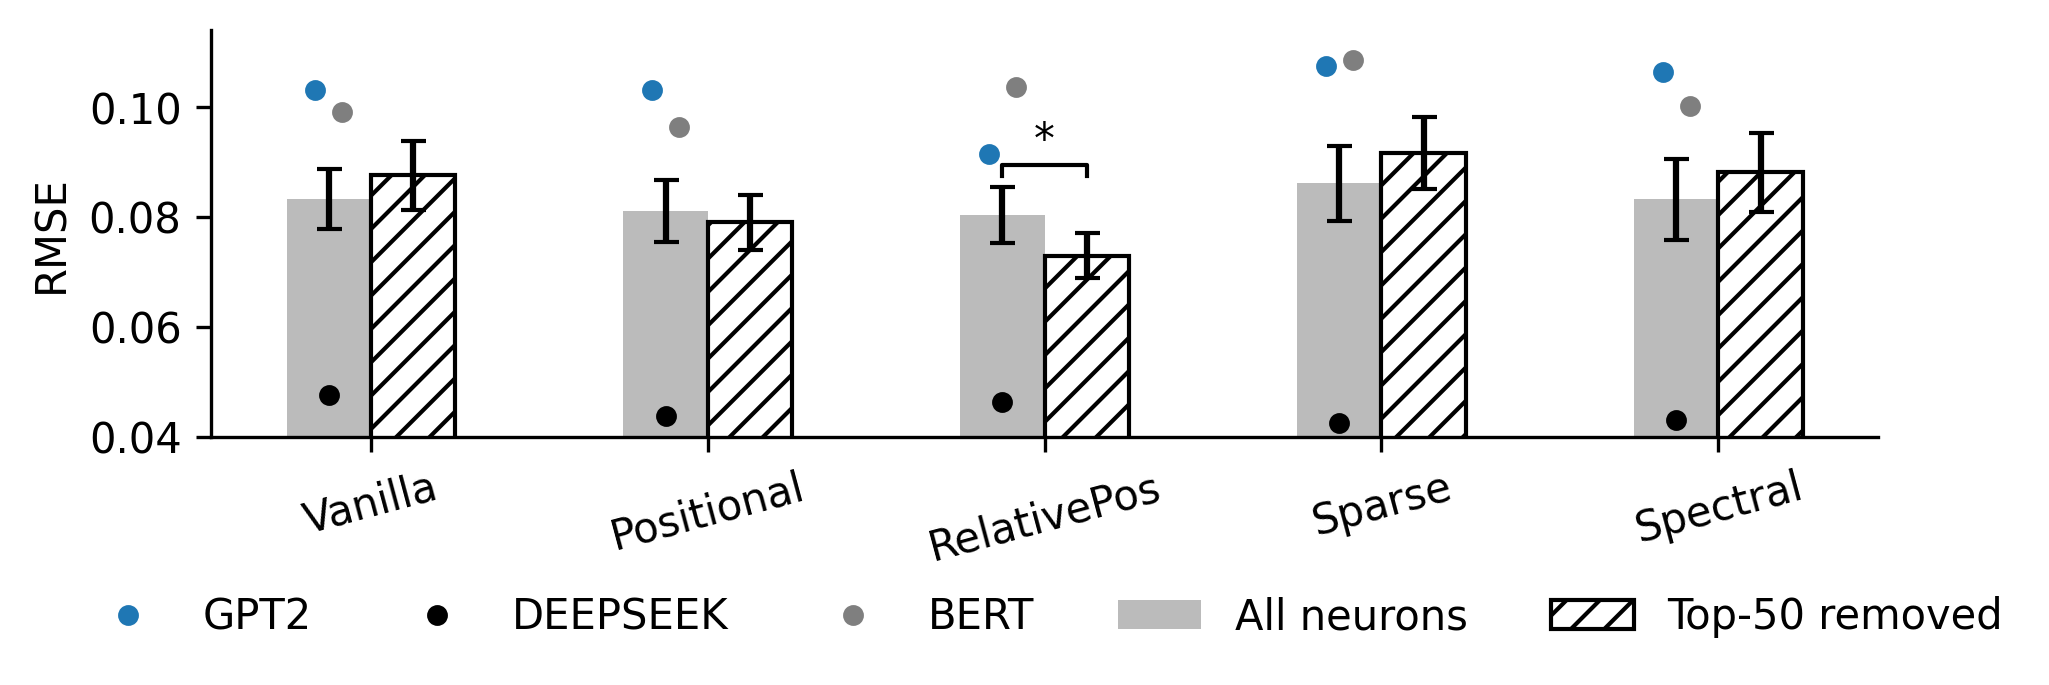

In [81]:
#!/usr/bin/env python3
# ------------------------------------------------------------------
#  BAR-PLOT:  All neurons  vs.  Top-50-removed
#             pooled across models for each embedding strategy
# ------------------------------------------------------------------
import os, glob, numpy as np, matplotlib.pyplot as plt
from scipy.stats import wilcoxon, sem

plt.rcParams["pdf.fonttype"] = 42   # editable text in PDF

# ------------------------------------------------------------------
# 0)  paths & constants
# ------------------------------------------------------------------
ROOT_A = os.path.abspath(       # experiment3_results  (all neurons)
    os.path.join(os.getcwd(), os.pardir, os.pardir, os.pardir,
                 "external_data", "nlp4neuro",
                 "results_april30", "experiment3_results")
)
ROOT_B = os.path.abspath(       # experiment3b_results/top50_removed
    os.path.join(os.getcwd(), os.pardir, os.pardir, os.pardir,
                 "external_data", "nlp4neuro",
                 "results_april30", "experiment3b_results")
)
SUB_B  = "top50_removed"        # choice: “top50_removed” vs “random50_removed”

EMBEDS  = ["Vanilla", "Positional", "RelativePos",
           "Sparse",  "Spectral"]
MODELS  = ["gpt2", "deepseek", "bert"]          # lowercase stub in file paths
RUNS    = range(1, 11)                          # 1 … 10

# colour / marker per model for the scatter overlay
COLORS = dict(gpt2="#1f77b4", deepseek="#000000", bert="#7f7f7f")
SHIFT  = [-0.04, 0.0, 0.04]                     # small x-jitter for circles

# ------------------------------------------------------------------
# 1) helper: collect RMSEs from a root (A or B)
# ------------------------------------------------------------------
def load_pool(root_dir, subfolder=None):
    """
    Return dict[embed] -> list of RMSEs  pooled over models and runs.
    """
    pool = {e: [] for e in EMBEDS}
    for run in RUNS:
        run_dir = os.path.join(root_dir,
                               (subfolder if subfolder else f"run_{run}"))
        if subfolder:    # experiment3b: ROOT_B/top50_removed/run_X
            run_dir = os.path.join(root_dir, subfolder, f"run_{run}")

        for model in MODELS:
            fam_dir = os.path.join(run_dir, f"{model}_embedding_comparisons")
            for emb in EMBEDS:
                e_low = emb.lower()
                emb_dir = os.path.join(fam_dir, e_low)
                if not os.path.isdir(emb_dir):
                    continue
                # predictions & ground-truth
                preds_glob = glob.glob(os.path.join(
                    emb_dir, f"{model}_{e_low}_preds_run{run}.npy"))
                if len(preds_glob) != 1:
                    continue
                preds = np.load(preds_glob[0])
                gt_path = os.path.join(
                    emb_dir, f"{model}_{e_low}_groundtruth.npy")
                y_true = np.load(gt_path) if os.path.isfile(gt_path) \
                         else np.load(os.path.join(root_dir,
                                         "groundtruth_test.npy"))
                rmse = np.sqrt(np.mean((preds - y_true) ** 2))
                pool[emb].append(rmse)
    return pool

pool_all  = load_pool(ROOT_A)                          # experiment 3
pool_top  = load_pool(ROOT_B, subfolder=SUB_B)         # experiment 3b

# ------------------------------------------------------------------
# 2)  compute stats
# ------------------------------------------------------------------
means_all = [np.mean(pool_all[e]) for e in EMBEDS]
errs_all  = [sem( pool_all[e])    for e in EMBEDS]
means_top = [np.mean(pool_top[e]) for e in EMBEDS]
errs_top  = [sem( pool_top[e])    for e in EMBEDS]

p_vals = {e: wilcoxon(pool_all[e], pool_top[e]).pvalue
          for e in EMBEDS}

# ------------------------------------------------------------------
# 3)  plotting
# ------------------------------------------------------------------
fig, ax = plt.subplots(figsize=(7, 1.5), dpi=300)

x = np.arange(len(EMBEDS))
bw = 0.25

# baseline bars (all neurons)
ax.bar(x - bw/2, means_all, yerr=errs_all, width=bw,
       color="#bbbbbb", label="All neurons", capsize=3)

# top-50-removed bars (hatched)
ax.bar(x + bw/2, means_top, yerr=errs_top, width=bw,
       color="#ffffff", edgecolor="#000000", linewidth=1,
       hatch="///", label="Top-50 removed", capsize=3)

# overlay model means as coloured circles
for m_idx, model in enumerate(MODELS):
    col = COLORS[model]
    for e_idx, emb in enumerate(EMBEDS):
        # mean for this model & embedding in each condition
        #   — show only the “all neurons” circle to avoid clutter
        model_vals = []
        for run in RUNS:
            run_dir = os.path.join(ROOT_A, f"run_{run}",
                        f"{model}_embedding_comparisons", emb.lower())
            p = glob.glob(os.path.join(run_dir,
                         f"{model}_{emb.lower()}_preds_run{run}.npy"))
            if len(p) != 1: continue
            preds = np.load(p[0])
            y_true = np.load(os.path.join(run_dir,
                         f"{model}_{emb.lower()}_groundtruth.npy"))
            model_vals.append(np.sqrt(np.mean((preds - y_true) ** 2)))
        if model_vals:
            ax.plot(e_idx - bw/2 + SHIFT[m_idx],
                    np.mean(model_vals), "o", color=col, markersize=4,
                    label=model.upper() if e_idx==0 else None)

# aesthetics
ax.set_xticks(x)
ax.set_xticklabels(EMBEDS, rotation=15)
ax.set_ylabel("RMSE")
ax.set_ylim(0.04, None)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

# significance bracket
h = 0.002
pad = 0.0005
for e_idx, emb in enumerate(EMBEDS):
    if p_vals[emb] < 0.05:
        y0 = max(means_all[e_idx] + errs_all[e_idx],
                 means_top[e_idx] + errs_top[e_idx]) + h
        x0 = e_idx - bw/2
        x1 = e_idx + bw/2
        ax.plot([x0, x0, x1, x1],
                [y0, y0 + h, y0 + h, y0],
                color='k', lw=1)
        ax.text(e_idx, y0 + h + pad,
                '*', ha='center', va='bottom', fontsize=10)

# legend below
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels,
          ncol=5, frameon=False,
          loc='upper center',
          bbox_to_anchor=(0.5, -0.35),
          borderaxespad=0.)

plt.tight_layout()
plt.subplots_adjust(bottom=-0.005)
out_pdf = os.path.join(ROOT_B, "final_plots_and_stats",
                       "embeddings_all_vs_top50_removed.pdf")
plt.savefig(out_pdf, dpi=300, transparent=True, bbox_inches="tight")
print("Figure saved to:", out_pdf)

# ------------------------------------------------------------------
# 4)  print p-values
# ------------------------------------------------------------------
print("\nWilcoxon signed-rank p-values  (all  vs  top-50-removed)")
for emb in EMBEDS:
    print(f"{emb:12s}:  p = {p_vals[emb]:.3e}")


## 3c)

Saved: figures\deepseek_salient_vs_random_with_sig.pdf

DeepSeek Wilcoxon p-values:
Vanilla      p = 7.695e-01
Positional   p = 6.250e-01
RelativePos  p = 1.055e-01
Sparse       p = 1.602e-01
Spectral     p = 4.922e-01
Vanilla      Shapiro-W difference p = 0.292
Positional   Shapiro-W difference p = 0.284
RelativePos  Shapiro-W difference p = 0.002
Sparse       Shapiro-W difference p = 0.015
Spectral     Shapiro-W difference p = 0.108


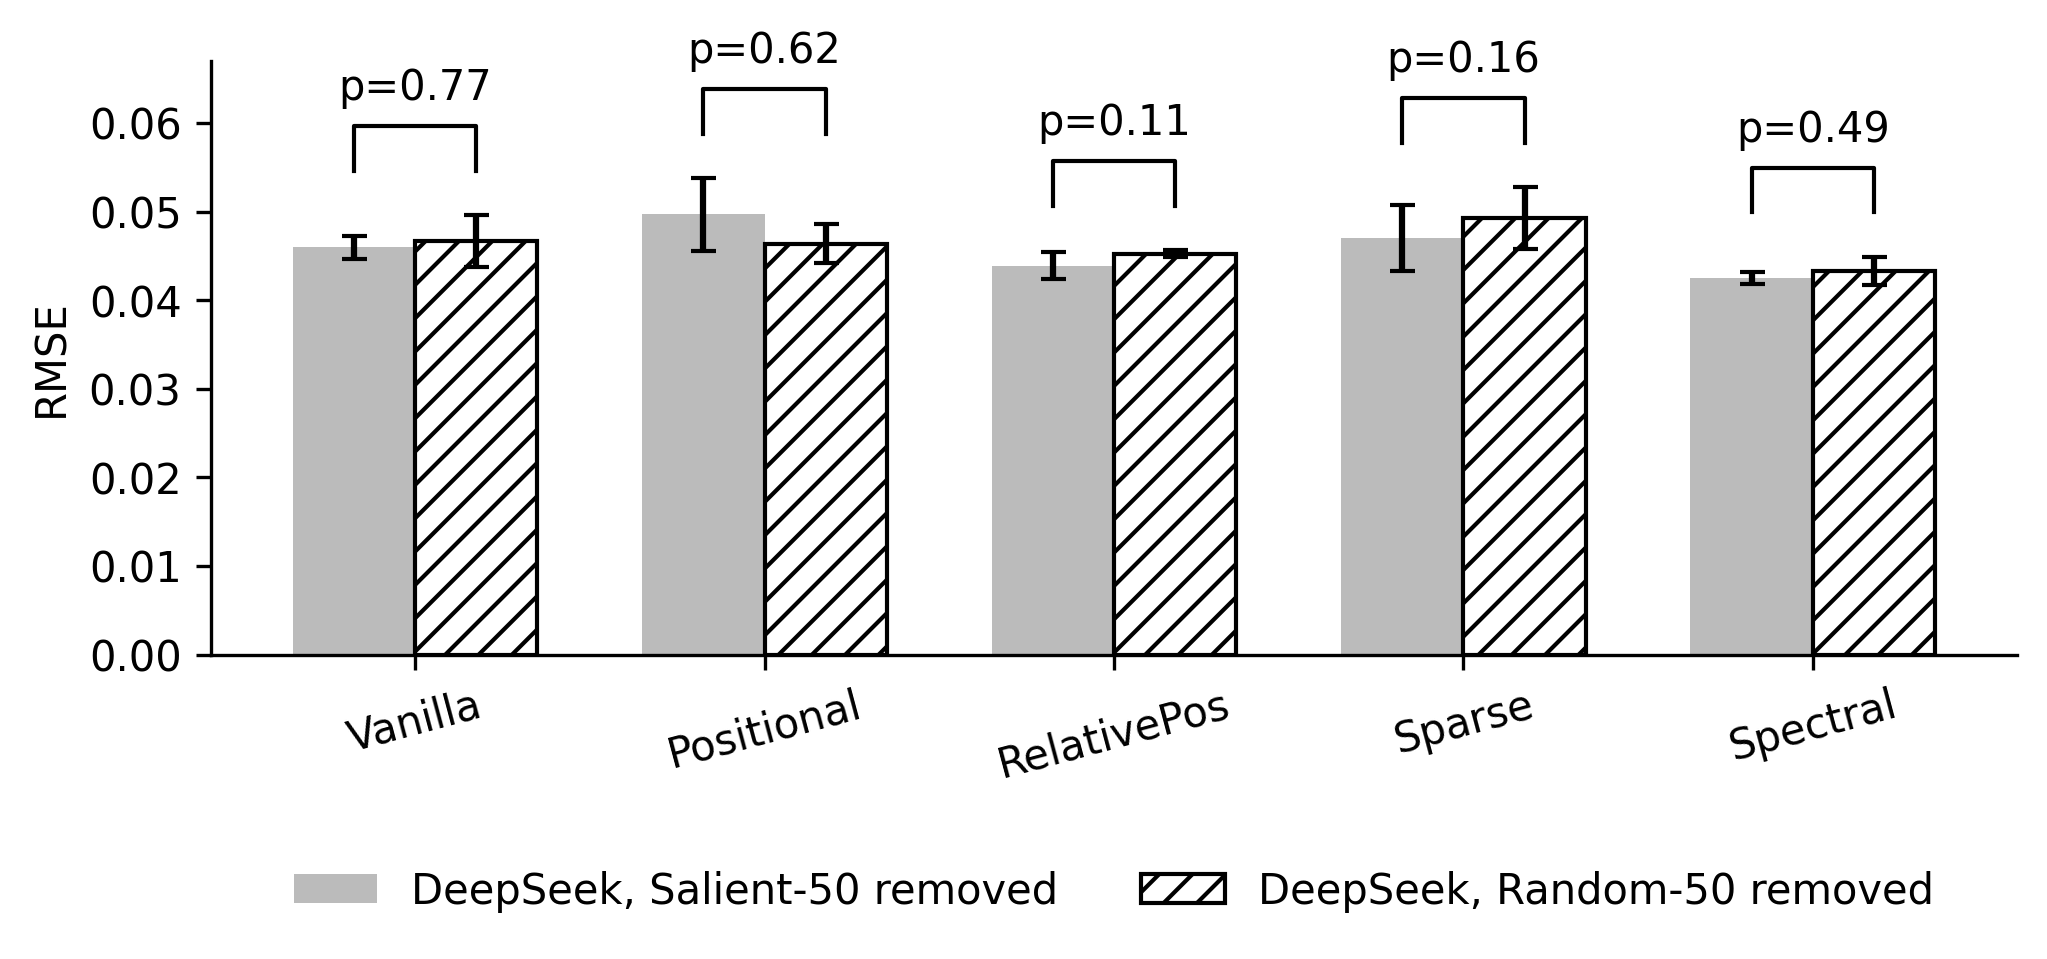

In [82]:
# ------------------------------------------------------------------
# 3a) DeepSeek-only barplot: Salient-50 vs Random-50 (with sig. tests)
# ------------------------------------------------------------------
from scipy.stats import wilcoxon

# compute DeepSeek means+SEMs
ds_means_sal = [ np.mean(by_mod["salient"][e]["deepseek"]) for e in EMBEDS ]
ds_errs_sal  = [ sem(by_mod["salient"][e]["deepseek"]) for e in EMBEDS ]
ds_means_rnd = [ np.mean(by_mod["random"][e]["deepseek"]) for e in EMBEDS ]
ds_errs_rnd  = [ sem(by_mod["random"][e]["deepseek"]) for e in EMBEDS ]

# compute Wilcoxon p-values
ds_pvals = {}
for e in EMBEDS:
    a = by_mod["salient"][e]["deepseek"]
    b = by_mod["random"][e]["deepseek"]
    try:
        ds_pvals[e] = wilcoxon(a, b).pvalue
    except Exception:
        ds_pvals[e] = np.nan

fig, ax = plt.subplots(figsize=(7, 3.5), dpi=300)
x  = np.arange(len(EMBEDS))
bw = 0.35

# bars
ax.bar(x - bw/2, ds_means_sal, yerr=ds_errs_sal, width=bw,
       color="#bbbbbb", label="DeepSeek, Salient-50 removed", capsize=3)
ax.bar(x + bw/2, ds_means_rnd, yerr=ds_errs_rnd, width=bw,
       color="#ffffff", edgecolor="#000", linewidth=1,
       hatch="///", label="DeepSeek, Random-50 removed", capsize=3)

# significance brackets
h   = 0.005    # height offset
pad = 0.002    # text offset
for i, e in enumerate(EMBEDS):
    p = ds_pvals[e]
    # top of each bar + its error
    y1 = ds_means_sal[i] + ds_errs_sal[i]
    y2 = ds_means_rnd[i] + ds_errs_rnd[i]
    y0 = max(y1, y2) + h
    x0, x1 = i - bw/2, i + bw/2

    # draw the bracket
    ax.plot([x0, x0, x1, x1],
            [y0, y0 + h, y0 + h, y0],
            color='k', lw=1, clip_on=False)

    # star for p<.05, otherwise show p-value
    if not np.isnan(p) and p < 0.05:
        txt = '*'
    else:
        txt = f"p={p:.2f}" if not np.isnan(p) else "n/a"

    ax.text(i, y0 + h + pad, txt,
            ha='center', va='bottom', fontsize=10)

# simple aesthetics
ax.set_xticks(x)
ax.set_xticklabels(EMBEDS, rotation=15)
ax.set_ylabel("RMSE")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.legend(ncol=2, frameon=False, loc="upper center", bbox_to_anchor=(0.5, -0.3))

plt.tight_layout()
out1 = OUTDIR / "deepseek_salient_vs_random_with_sig.pdf"
plt.savefig(out1, dpi=300, bbox_inches="tight", transparent=True)
print("Saved:", out1)

# also print p-values to console
print("\nDeepSeek Wilcoxon p-values:")
for e in EMBEDS:
    print(f"{e:12s} p = {ds_pvals[e]:.3e}")

from scipy.stats import shapiro

for e in EMBEDS:
    a = by_mod["salient"][e]["deepseek"]
    b = by_mod["random"][e]["deepseek"]
    stat, p = shapiro(np.array(a) - np.array(b))
    print(f"{e:12s} Shapiro-W difference p = {p:.3f}")


Saved: figures\embeddings_random_with_models_sig.pdf

Wilcoxon p-values (transformers as data points):
Vanilla vs Positional  : p = 2.500e-01
Vanilla vs RelativePos : p = 2.500e-01
Vanilla vs Sparse      : p = 2.500e-01
Vanilla vs Spectral    : p = 2.500e-01


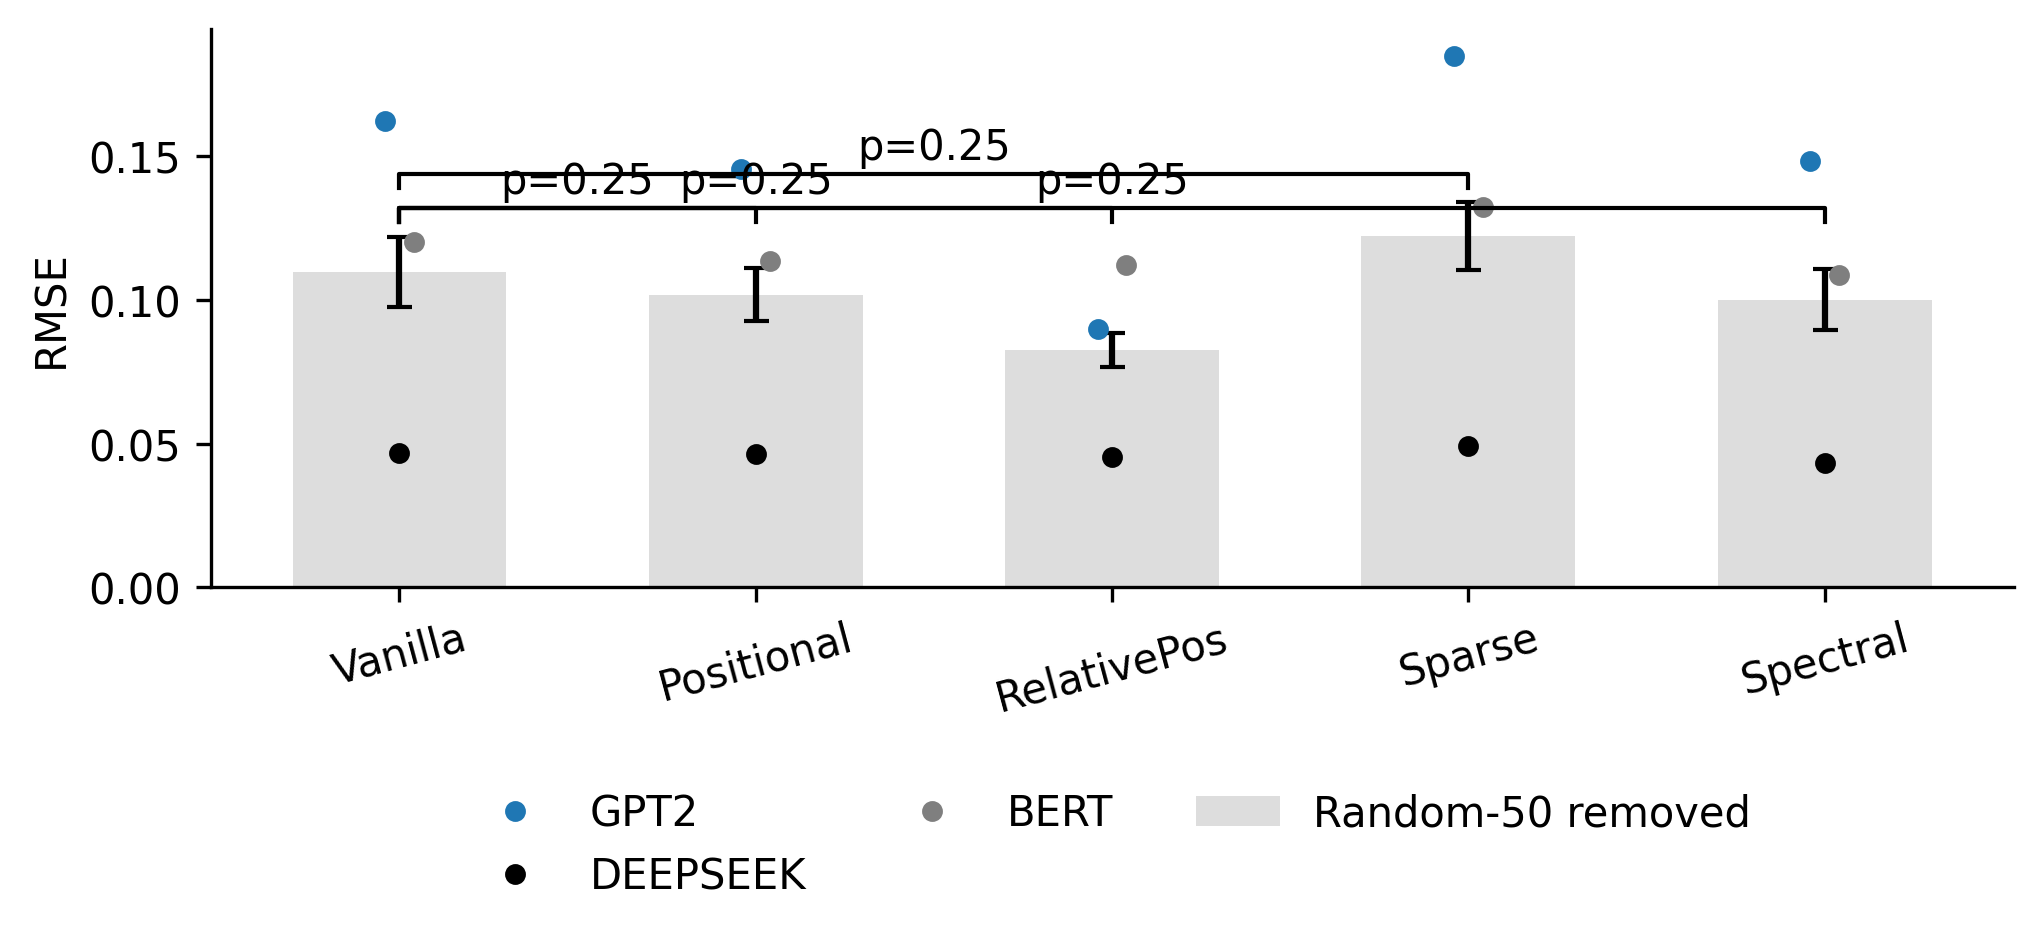

In [84]:
# ------------------------------------------------------------------
# 3b) Random-only barplot with coloured model-means overlay + Wilcoxon
# ------------------------------------------------------------------
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import wilcoxon

fig, ax = plt.subplots(figsize=(7, 3.5), dpi=300)

# random-50 bars
ax.bar(x, means_rnd, yerr=errs_rnd, width=0.6,
       color="#dddddd", label="Random-50 removed", capsize=3)

# overlay per-model means (random)
for m_idx, model in enumerate(MODELS):
    col = COLORS[model]
    for e_idx, emb in enumerate(EMBEDS):
        vals = by_mod["random"][emb][model]
        if vals:
            ax.plot(e_idx + SHIFT[m_idx],
                    np.mean(vals), "o",
                    color=col, markersize=4,
                    label=model.upper() if e_idx==0 else None)

# ---------------------------------------------------------
# compute Wilcoxon tests across transformers (models)
# treating each model's mean as one paired data point
# ---------------------------------------------------------
baseline = "Vanilla"
baseline_idx = EMBEDS.index(baseline)
others = [e for e in EMBEDS if e != baseline]

# collect per-model means for each embedding
model_means_per_embed = {
    emb: [np.mean(by_mod["random"][emb][m]) for m in MODELS]
    for emb in EMBEDS
}

# run Wilcoxon signed‐rank between Vanilla and each other embed
embed_pvals = {}
for emb in others:
    a = model_means_per_embed[baseline]
    b = model_means_per_embed[emb]
    try:
        _, p = wilcoxon(a, b)
    except ValueError:
        p = np.nan
    embed_pvals[emb] = p

# annotate significance on the plot
h   = 0.005  # bracket height offset
pad = 0.002  # text offset
for emb, p in embed_pvals.items():
    i = EMBEDS.index(emb)
    x0, x1 = baseline_idx, i
    y0 = max(means_rnd[baseline_idx] + errs_rnd[baseline_idx],
             means_rnd[i] + errs_rnd[i]) + h

    # draw bracket
    ax.plot([x0, x0, x1, x1],
            [y0, y0+h, y0+h, y0],
            color='k', lw=1, clip_on=False)

    # star if p<0.05 else p-value
    txt = '*' if (not np.isnan(p) and p < 0.05) else f"p={p:.2f}"
    ax.text((x0 + x1) / 2, y0 + h + pad, txt,
            ha='center', va='bottom', fontsize=10)

# aesthetics
ax.set_xticks(x)
ax.set_xticklabels(EMBEDS, rotation=15)
ax.set_ylabel("RMSE")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.legend(ncol=3, frameon=False,
          loc="upper center", bbox_to_anchor=(0.5, -0.3))

plt.tight_layout()
out2 = OUTDIR / "embeddings_random_with_models_sig.pdf"
plt.savefig(out2, dpi=300, bbox_inches="tight", transparent=True)
print("Saved:", out2)

# print p-values
print("\nWilcoxon p-values (transformers as data points):")
for emb, p in embed_pvals.items():
    star = " *" if (not np.isnan(p) and p < 0.05) else ""
    print(f"Vanilla vs {emb:<12s}: p = {p:.3e}{star}")


Figure saved to: figures\embeddings_salient_vs_random_removed.pdf

Wilcoxon signed-rank p-values  (Salient-50  vs  Random-50)
Vanilla     :  p = 6.850e-01
Positional  :  p = 8.712e-01
RelativePos :  p = 2.129e-01
Sparse      :  p = 9.677e-01
Spectral    :  p = 3.707e-01


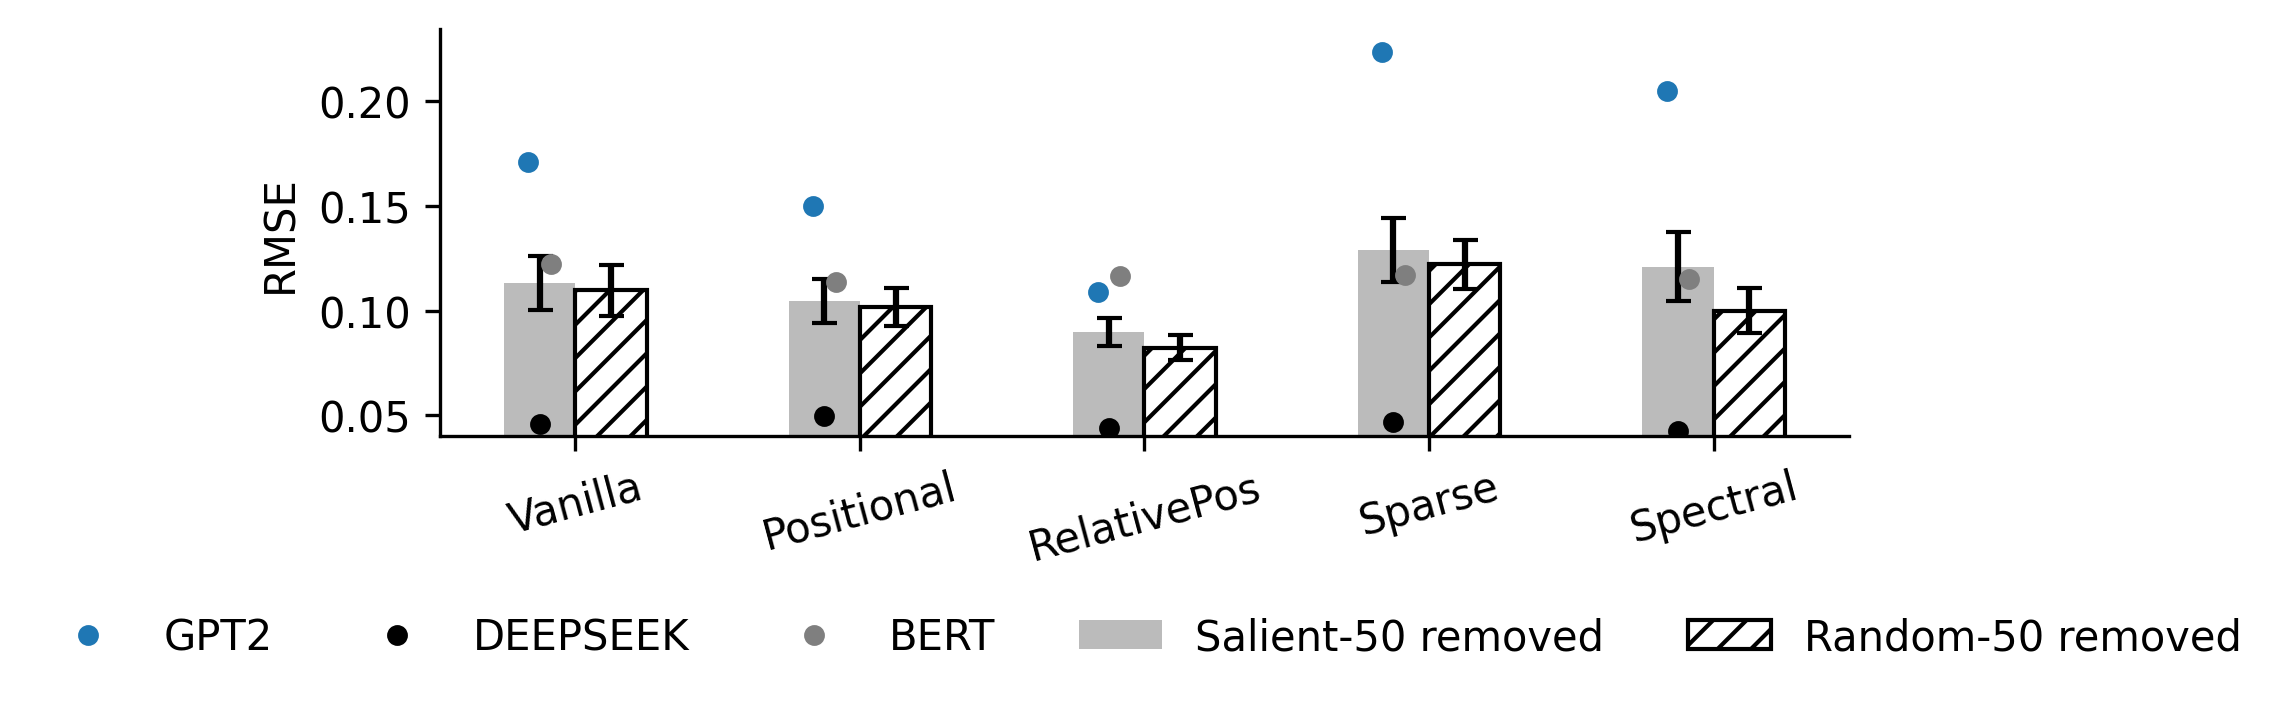

In [85]:
import re, numpy as np, matplotlib.pyplot as plt
from scipy.stats import wilcoxon, sem

# … your imports, constants, etc. …

LOGFILE = "salient_random_logs.txt"

# ------------------------------------------------------------------
# 1)  Read & parse the log file line by line
# ------------------------------------------------------------------
cond_pat    = re.compile(r"━━\s+(salient50_removed|random50_removed)")
arrow_pat   = re.compile(r"→\s+([A-Za-z0-9]+)\s+\+\s+([A-Za-z0-9]+)")
summary_pat = re.compile(r"^\s+RMSE\s+([0-9.]+)$")

# initialize containers
EMBEDS  = ["Vanilla","Positional","RelativePos","Sparse","Spectral"]
MODELS  = ["gpt2","deepseek","bert"]
RUNS    = range(1,11)
pool    = {c:{e:[] for e in EMBEDS} for c in ("salient","random")}
by_mod  = {c:{e:{m:[] for m in MODELS} for e in EMBEDS}
                   for c in ("salient","random")}

current_cond  = None
current_model = None
current_emb   = None

with open(LOGFILE, "r", encoding="utf-8", errors="replace") as f:
    for line in f:
        # detect condition headers
        m = cond_pat.search(line)
        if m:
            current_cond = "salient" if "salient" in m.group(1) else "random"
            continue

        # detect lines like "→ GPT2 + Vanilla"
        m = arrow_pat.search(line)
        if m:
            current_model = m.group(1).lower()
            emb_raw       = m.group(2)
            # normalize embed name
            if emb_raw.lower() == "relativepos":
                current_emb = "RelativePos"
            else:
                current_emb = emb_raw.capitalize()
            continue

        # detect the summary "   RMSE 0.04237"
        m = summary_pat.match(line)
        if m and current_cond and current_model and current_emb:
            rmse = float(m.group(1))
            pool[current_cond][current_emb].append(rmse)
            by_mod[current_cond][current_emb][current_model].append(rmse)

# now pool["salient"]["Vanilla"] etc are full lists of 30 values each

# ------------------------------------------------------------------
# 2)  compute means, SEM, and Wilcoxon p-values
# ------------------------------------------------------------------
means_sal = [ np.mean(pool["salient"][e]) for e in EMBEDS ]
errs_sal  = [ sem(pool["salient"][e])     for e in EMBEDS ]

means_rnd = [ np.mean(pool["random"][e])  for e in EMBEDS ]
errs_rnd  = [ sem(pool["random"][e])      for e in EMBEDS ]

# catch any empty/mismatch gracefully
p_vals = {}
for e in EMBEDS:
    a = pool["salient"][e]
    b = pool["random"][e]
    try:
        p_vals[e] = wilcoxon(a, b).pvalue
    except Exception:
        p_vals[e] = np.nan

# … now continue with your plotting exactly as before, using means_sal/errs_sal,
#    means_rnd/errs_rnd, and p_vals …



# ------------------------------------------------------------------
# 3)  plotting
# ------------------------------------------------------------------
fig, ax = plt.subplots(figsize=(7, 1.5), dpi=300)

x  = np.arange(len(EMBEDS))
bw = 0.25

# Salient-50 bars (grey)
ax.bar(x - bw/2, means_sal, yerr=errs_sal, width=bw,
       color="#bbbbbb", label="Salient-50 removed", capsize=3)

# Random-50 bars (hatched white)
ax.bar(x + bw/2, means_rnd, yerr=errs_rnd, width=bw,
       color="#ffffff", edgecolor="#000000", linewidth=1,
       hatch="///", label="Random-50 removed", capsize=3)

# overlay model means (Salient condition) as coloured circles
for m_idx, model in enumerate(MODELS):
    col = COLORS[model]
    for e_idx, emb in enumerate(EMBEDS):
        vals = by_mod["salient"][emb][model]
        if vals:
            ax.plot(e_idx - bw/2 + SHIFT[m_idx],
                    np.mean(vals), "o", color=col, markersize=4,
                    label=model.upper() if e_idx==0 else None)

# aesthetics
ax.set_xticks(x)
ax.set_xticklabels(EMBEDS, rotation=15)
ax.set_ylabel("RMSE")
ax.set_ylim(0.04, None)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

# significance bracket
h, pad = 0.002, 0.0005
for e_idx, emb in enumerate(EMBEDS):
    if p_vals[emb] < 0.05:
        y0 = max(means_sal[e_idx] + errs_sal[e_idx],
                 means_rnd[e_idx] + errs_rnd[e_idx]) + h
        x0, x1 = e_idx - bw/2, e_idx + bw/2
        ax.plot([x0, x0, x1, x1], [y0, y0+h, y0+h, y0],
                color='k', lw=1)
        ax.text(e_idx, y0+h+pad, '*',
                ha='center', va='bottom', fontsize=10)

# legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels,
          ncol=5, frameon=False,
          loc='upper center',
          bbox_to_anchor=(0.5, -0.35))

plt.tight_layout()
plt.subplots_adjust(bottom=-0.005)

out_pdf = OUTDIR / "embeddings_salient_vs_random_removed.pdf"
plt.savefig(out_pdf, dpi=300, transparent=True, bbox_inches="tight")
print("Figure saved to:", out_pdf)

# ------------------------------------------------------------------
# 4)  print p-values
# ------------------------------------------------------------------
print("\nWilcoxon signed-rank p-values  (Salient-50  vs  Random-50)")
for emb in EMBEDS:
    print(f"{emb:12s}:  p = {p_vals[emb]:.3e}")


Figure saved to: figures\barplot_random_by_model.pdf

Pooled-transformer Mann–Whitney U p-values  (condition = random):
Vanilla     vs Positional : p = 8.883e-01
Vanilla     vs RelativePos: p = 1.260e-01
Vanilla     vs Sparse     : p = 2.939e-01
Vanilla     vs Spectral   : p = 5.201e-01
Positional  vs RelativePos: p = 2.398e-01
Positional  vs Sparse     : p = 2.116e-01
Positional  vs Spectral   : p = 5.793e-01
RelativePos vs Sparse     : p = 1.628e-02
RelativePos vs Spectral   : p = 5.493e-01
Sparse      vs Spectral   : p = 1.055e-01

Within-model Mann–Whitney U p-values:

  GPT2:
    Vanilla     vs Positional : p = 9.698e-01 
    Vanilla     vs RelativePos: p = 1.726e-02 **
    Vanilla     vs Sparse     : p = 2.263e-01 
    Vanilla     vs Spectral   : p = 7.337e-01 
    Positional  vs RelativePos: p = 1.133e-02 **
    Positional  vs Sparse     : p = 7.566e-02 
    Positional  vs Spectral   : p = 9.698e-01 
    RelativePos vs Sparse     : p = 3.298e-04 **
    RelativePos vs Spectral   

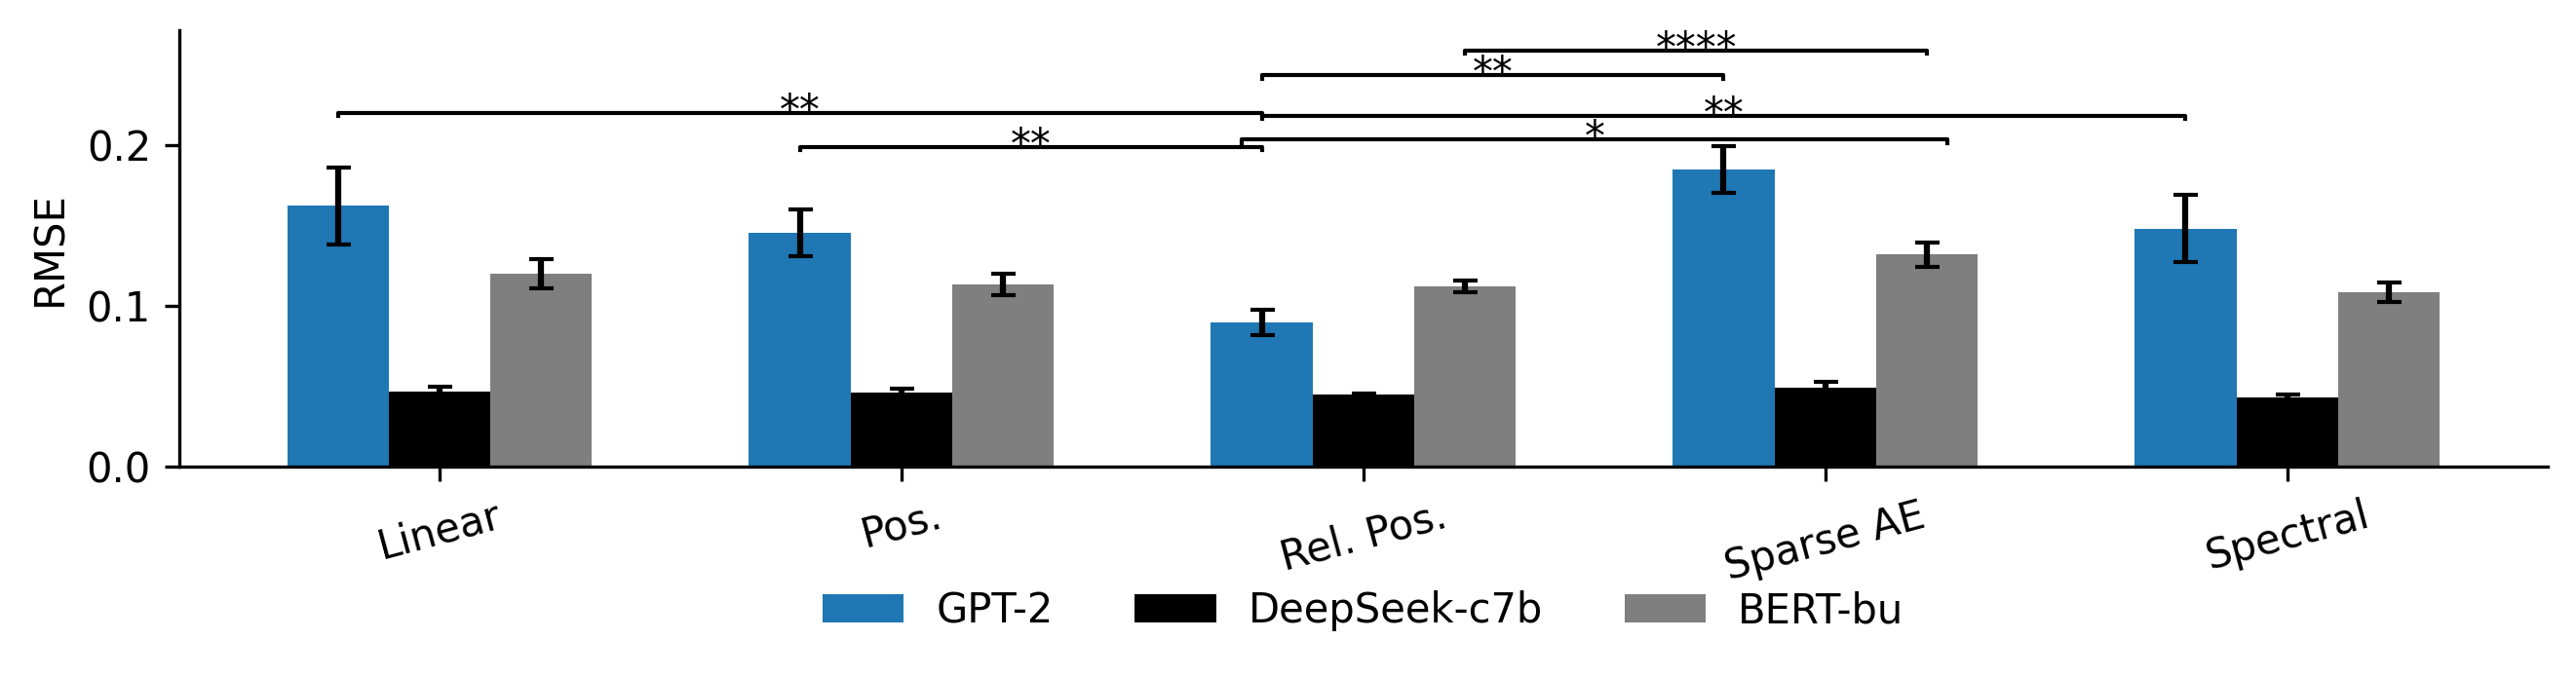

In [136]:
#!/usr/bin/env python3
# barplot_random_by_model.py
# J. May 2025 – coloured bars per model, pooled‐only brackets,
#                custom legend labels, plus within‐model significance
#                (with BERT’s brackets lifted higher)

import re
import itertools
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu, sem
from pathlib import Path

# ─── CONSTANTS ────────────────────────────────────────────────────────────────
LOGFILE      = "salient_random_logs.txt"
OUTDIR       = Path("figures")
OUTDIR.mkdir(exist_ok=True)

EMBEDS       = ["Vanilla", "Positional", "RelativePos", "Sparse", "Spectral"]
MODELS       = ["gpt2", "deepseek", "bert"]
COLORS       = dict(
    gpt2     = "#1f77b4",    # blue
    deepseek = "#000000",    # black
    bert     = "#7f7f7f"     # grey
)
DISPLAY      = dict(
    gpt2     = "GPT-2",
    deepseek = "DeepSeek-c7b",
    bert     = "BERT-bu"
)
COND_TO_PLOT = "random"     # random50_removed only
alpha        = 0.05         # significance threshold

# ─── REGEX PATTERNS & DATA STRUCTURE ────────────────────────────────────────
cond_pat    = re.compile(r"━━\s+(salient50_removed|random50_removed)")
arrow_pat   = re.compile(r"→\s+([A-Za-z0-9]+)\s+\+\s+([A-Za-z0-9]+)")
summary_pat = re.compile(r"^\s+RMSE\s+([0-9.]+)$")

by_mod = {
    cond: {emb: {model: [] for model in MODELS} for emb in EMBEDS}
    for cond in ("salient", "random")
}

# ─── PARSE LOG FILE ──────────────────────────────────────────────────────────
cur_cond = cur_model = cur_emb = None
with open(LOGFILE, encoding='utf-8', errors='replace') as f:
    for line in f:
        m = cond_pat.search(line)
        if m:
            cur_cond = "salient" if "salient" in m.group(1) else "random"
            continue
        m = arrow_pat.search(line)
        if m:
            cur_model = m.group(1).lower()
            raw_emb   = m.group(2)
            cur_emb   = "RelativePos" if raw_emb.lower() == "relativepos" else raw_emb.capitalize()
            continue
        m = summary_pat.match(line)
        if m and cur_cond and cur_model and cur_emb:
            by_mod[cur_cond][cur_emb][cur_model].append(float(m.group(1)))

# ─── COMPUTE MEANS, SEM & POOLING ───────────────────────────────────────────
means = np.array([
    [np.mean(by_mod[COND_TO_PLOT][emb][model]) for model in MODELS]
    for emb in EMBEDS
])
errs = np.array([
    [sem(by_mod[COND_TO_PLOT][emb][model]) for model in MODELS]
    for emb in EMBEDS
])
pooled = {
    emb: sum((by_mod[COND_TO_PLOT][emb][m] for m in MODELS), [])
    for emb in EMBEDS
}

# ─── POOLED-EMBEDDING TESTS ─────────────────────────────────────────────────
pair_pvals = {}
for i, j in itertools.combinations(range(len(EMBEDS)), 2):
    _, p = mannwhitneyu(
        pooled[EMBEDS[i]],
        pooled[EMBEDS[j]],
        alternative="two-sided"
    )
    pair_pvals[(i, j)] = p

# ─── SET UP PLOT ────────────────────────────────────────────────────────────
fig, ax = plt.subplots(figsize=(9, 2.5), dpi=300)
x  = np.arange(len(EMBEDS))
bw = 0.22

# draw bars per model
for m_idx, model in enumerate(MODELS):
    xs = x + (m_idx - 1) * bw
    ax.bar(xs,
           means[:, m_idx],
           yerr=errs[:, m_idx],
           width=bw,
           color=COLORS[model],
           capsize=3,
           label=DISPLAY[model])

# aesthetics
ax.set_xticks(x)
ax.set_xticklabels(
    ["Linear", "Pos.", "Rel. Pos.", "Sparse AE", "Spectral"],
    rotation=15
)
ax.set_ylabel("RMSE")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.legend(
    ncol=3,
    frameon=False,
    loc="upper center",
    bbox_to_anchor=(0.5, -0.20)
)

# ─── DRAW POOLED-EMBEDDING BRACKETS & STARS ────────────────────────────────
h         = 0.002      # bracket vertical height
pad       = -h * 6    # star offset above bracket
stack_sep = h * 2.5    # vertical separation between bracket levels

tops_emb     = [max(means[i] + errs[i]) for i in range(len(EMBEDS))]
pooled_stack = 0

for (i, j), p in pair_pvals.items():
    if p < alpha:
        y0 = max(tops_emb[i], tops_emb[j])
        y  = y0 + h + pooled_stack * stack_sep

        x0 = i - 1.2 * bw
        x1 = j + 1.2 * bw

        ax.plot([x0, x0, x1, x1],
                [y,  y+h, y+h, y],
                color="k", lw=1)
        ax.text((x0 + x1)/2,
                y + h + pad,
                '*',
                ha='center', va='bottom', color="k")

        pooled_stack += 1

# ─── WITHIN-MODEL TESTS & BRACKETS ──────────────────────────────────────────
base_offset     = pooled_stack + 5
stacks_by_model = {m_idx: 0 for m_idx in range(len(MODELS))}
star_map        = {0: "**", 1: "***", 2: "****"}

for m_idx, model in enumerate(MODELS):
    for i, j in itertools.combinations(range(len(EMBEDS)), 2):
        data_i = by_mod[COND_TO_PLOT][EMBEDS[i]][model]
        data_j = by_mod[COND_TO_PLOT][EMBEDS[j]][model]
        _, p = mannwhitneyu(data_i, data_j, alternative="two-sided")
        if p < alpha:
            # x‐positions of bars for this model
            x0 = i + (m_idx - 1) * bw
            x1 = j + (m_idx - 1) * bw

            # baseline above whichever bar+error is taller
            top_i = means[i, m_idx] + errs[i, m_idx]
            top_j = means[j, m_idx] + errs[j, m_idx]
            y0    = max(top_i, top_j)

            # **increase lift factor**: multiply m_idx by 2
            model_base = base_offset + (m_idx * 8.5)
            offset     = model_base + stacks_by_model[m_idx]
            y          = y0 + h + offset * stack_sep

            # draw bracket
            ax.plot([x0, x0, x1, x1],
                    [y,  y+h, y+h, y],
                    color="k", lw=1)
            # draw stars
            ax.text((x0 + x1)/2,
                    y + h + pad,
                    star_map[m_idx],
                    ha='center', va='bottom', color="k")

            stacks_by_model[m_idx] += 1

# ─── FINALIZE & SAVE ────────────────────────────────────────────────────────
fig.tight_layout()
out_pdf = OUTDIR / "barplot_random_by_model.pdf"
fig.savefig(out_pdf, transparent=True, bbox_inches="tight")
print("Figure saved to:", out_pdf)

# ─── PRINT P-VALUES ─────────────────────────────────────────────────────────
print(f"\nPooled-transformer Mann–Whitney U p-values  (condition = {COND_TO_PLOT}):")
for (i, j), p in pair_pvals.items():
    print(f"{EMBEDS[i]:11s} vs {EMBEDS[j]:11s}: p = {p:.3e}")

print("\nWithin-model Mann–Whitney U p-values:")
for m_idx, model in enumerate(MODELS):
    print(f"\n  {model.upper()}:")
    for i, j in itertools.combinations(range(len(EMBEDS)), 2):
        _, p = mannwhitneyu(
            by_mod[COND_TO_PLOT][EMBEDS[i]][model],
            by_mod[COND_TO_PLOT][EMBEDS[j]][model],
            alternative="two-sided"
        )
        sig = star_map[m_idx] if p < alpha else ""
        print(f"    {EMBEDS[i]:11s} vs {EMBEDS[j]:11s}: p = {p:.3e} {sig}")


# 4) Build tables...

In [8]:
# import os

# # adjust this relative path until it points at your experiment_6 results folder
# RESULTS_ROOT = os.path.abspath(
#     os.path.join(os.getcwd(), os.pardir, os.pardir, os.pardir,
#                  "external_data", "nlp4neuro", "results_april30", "experiment3_results")
# )

# print("Looking in:", RESULTS_ROOT)
# for root, dirs, files in os.walk(RESULTS_ROOT):
#     # only print the first two levels to keep it short
#     rel = os.path.relpath(root, RESULTS_ROOT)
#     depth = rel.count(os.sep)
#     if depth <= 3:
#         indent = "  " * depth
#         print(f"{indent}{os.path.basename(root)}/")
#         for f in files:
#             if f.endswith(".npy") or f.endswith(".png"):
#                 print(f"{indent}  {f}")


In [9]:
"""
Compute mean ± SEM RMSE and Pearson r for every model × sequence length,
bold the best RMSEs, mark * where DeepSeek-7B beats LSTM (Wilcoxon p<0.05),
and print a ready-to-paste LaTeX table with two-line cells (RMSE on top,
r underneath).

Adjust EXPT1 below to point at your experiment_1 directory.
"""
import os, numpy as np
from sklearn.metrics import mean_squared_error
from scipy.stats   import pearsonr, sem, wilcoxon

# ─── PATH TO experiment_1 ────────────────────────────────────────────────────
EXPT1 = r"C:\Users\jacob\OneDrive\Documents\GitHub\external_data\nlp4neuro\results_april30\experiment_1"

# folder key → pretty label
model_map = {
    "bert":            "BERT",
    "deepseek_moe":    "DeepSeek-7B",
    "gpt2_pretrained": "GPT-2",
    "lstm":            "LSTM",
    "reservoir":       "RC"
}

seqs, n_runs = [5, 10, 15, 20], 10

# ─── storage: lists of per-run scalars ───────────────────────────────────────
raw_rmse = {k: {s: [] for s in seqs} for k in model_map}
raw_r    = {k: {s: [] for s in seqs} for k in model_map}

# ─── helper: Fisher-averaged r for one run (6 components) ────────────────────
def run_fisher_r(y_true, y_pred):
    """
    Returns a single Pearson r for one run by:
      (1) computing r for each of 6 components,
      (2) Fisher-z transforming,
      (3) averaging, then inverse transforming.
    Shapes: (T, 6) for both arrays.
    """
    rs = [pearsonr(y_true[:, i], y_pred[:, i])[0] for i in range(y_true.shape[1])]
    z  = np.arctanh(np.clip(rs, -0.999999, 0.999999))
    return float(np.tanh(z.mean()))

# ─── collect metrics ─────────────────────────────────────────────────────────
for fish in sorted(os.listdir(EXPT1)):
    fdir = os.path.join(EXPT1, fish)
    if not os.path.isdir(fdir):
        continue

    gt_path = os.path.join(fdir, f"{fish}_final_predictions_groundtruth_test.npy")
    if not os.path.exists(gt_path):
        continue
    gt = np.load(gt_path)          # shape (T, 6)

    for run in range(1, n_runs + 1):
        for s in seqs:
            seq_dir = os.path.join(fdir, f"run_{run}", f"seq_{s}")
            for key in model_map:
                pfile = os.path.join(seq_dir, f"{fish}_final_predictions_{key}_test_run{run}.npy")
                if not os.path.exists(pfile):          # defensive
                    continue
                preds = np.load(pfile)                # shape (T, 6)

                raw_rmse[key][s].append(
                    np.sqrt(mean_squared_error(gt, preds))
                )
                raw_r[key][s].append(
                    run_fisher_r(gt, preds)
                )

# ─── aggregate across runs+fish (Fisher-z for r) ────────────────────────────
def fisher_mean_sem(r_list):
    r_arr  = np.asarray(r_list, dtype=float)
    z_arr  = np.arctanh(np.clip(r_arr, -0.999999, 0.999999))
    mean_z = z_arr.mean()
    sem_z  = sem(z_arr)
    mean_r = np.tanh(mean_z)
    sem_r  = sem_z * (1 - mean_r ** 2)    # delta-method
    return mean_r, sem_r

stats = {k: {} for k in model_map}
for key in model_map:
    for s in seqs:
        rm = np.asarray(raw_rmse[key][s], dtype=float)
        r_mean, r_sem = fisher_mean_sem(raw_r[key][s])
        stats[key][s] = dict(
            rmse_mean = rm.mean(),
            rmse_sem  = sem(rm),
            r_mean    = r_mean,
            r_sem     = r_sem
        )

# ─── significance: DeepSeek vs LSTM (Wilcoxon signed-rank) ───────────────────
sig = {}
for s in seqs:
    p = wilcoxon(raw_rmse["deepseek_moe"][s],
                 raw_rmse["lstm"][s],
                 correction=True
                )[1]
    sig[s] = p < 0.05

# ─── best RMSE per column for bolding ────────────────────────────────────────
best_rmse = {s: min(stats[k][s]["rmse_mean"] for k in model_map) for s in seqs}

# ─── print LaTeX table ───────────────────────────────────────────────────────
print(r"\begin{table*}[!htbp]")
print(r"\centering")
print(r"\caption{Results Summary for Experiments 1--3: Performance vs.\ Sequence "
      r"Length.  Top line in each cell shows RMSE $\pm$~SEM; second line shows "
      r"Pearson's $r \pm$~SEM.  \textbf{Bold} marks the lowest RMSE in each "
      r"column.  $^{*}$ indicates a Wilcoxon signed-rank test $p<0.05$ between "
      r"LSTM and DeepSeek-7B.}")
print(r"\label{tab:all_results}")
print(r"\begin{tabular}{lcccc}")
print(r"\toprule")
print(r"\textbf{Model} & $s=5$ & $s=10$ & $s=15$ & $s=20$ \\")
print(r"\midrule")

for key, pretty in model_map.items():
    cells = []
    for s in seqs:
        m = stats[key][s]
        cell = (f"{m['rmse_mean']:.3f} $\\pm$ {m['rmse_sem']:.3f}\\\\"
                f"({m['r_mean']:.2f} $\\pm$ {m['r_sem']:.2f})")
        if np.isclose(m['rmse_mean'], best_rmse[s]):
            cell = r"\textbf{" + cell + r"}"
        if key == "deepseek_moe" and sig[s]:
            cell += r"$^{*}$"
        cells.append(cell)
    print(f"{pretty} & " + " & ".join(cells) + r" \\")
print(r"\bottomrule")
print(r"\end{tabular}")
print(r"\end{table*}")


\begin{table*}[!htbp]
\centering
\caption{Results Summary for Experiments 1--3: Performance vs.\ Sequence Length.  Top line in each cell shows RMSE $\pm$~SEM; second line shows Pearson's $r \pm$~SEM.  \textbf{Bold} marks the lowest RMSE in each column.  $^{*}$ indicates a Wilcoxon signed-rank test $p<0.05$ between LSTM and DeepSeek-7B.}
\label{tab:all_results}
\begin{tabular}{lcccc}
\toprule
\textbf{Model} & $s=5$ & $s=10$ & $s=15$ & $s=20$ \\
\midrule
BERT & 0.060 $\pm$ 0.001\\(0.05 $\pm$ 0.01) & 0.053 $\pm$ 0.001\\(0.06 $\pm$ 0.01) & \textbf{0.052 $\pm$ 0.001\\(0.06 $\pm$ 0.01)} & 0.055 $\pm$ 0.002\\(0.06 $\pm$ 0.01) \\
DeepSeek-7B & \textbf{0.054 $\pm$ 0.003\\(0.10 $\pm$ 0.01)}$^{*}$ & \textbf{0.052 $\pm$ 0.001\\(0.08 $\pm$ 0.01)}$^{*}$ & 0.053 $\pm$ 0.001\\(0.10 $\pm$ 0.01)$^{*}$ & \textbf{0.052 $\pm$ 0.001\\(0.09 $\pm$ 0.01)}$^{*}$ \\
GPT-2 & 0.060 $\pm$ 0.002\\(0.07 $\pm$ 0.01) & 0.056 $\pm$ 0.002\\(0.06 $\pm$ 0.01) & 0.058 $\pm$ 0.001\\(0.05 $\pm$ 0.01) & 0.058 $\pm$ 0.002\\(0.0

In [10]:
#!/usr/bin/env python3
# =============================================================================
# experiment_2_table.py  –  Pre-trained vs. Un-trained comparison (Exp-2)
# =============================================================================
import os, re, numpy as np
from sklearn.metrics import mean_squared_error
from scipy.stats import pearsonr, sem, wilcoxon

# ─── PATH TO experiment_2 ────────────────────────────────────────────────────
EXPT2 = r"C:\Users\jacob\OneDrive\Documents\GitHub\external_data\nlp4neuro\results_april30\experiment_2"

# two sequence lengths in this experiment
seqs         = [5, 20]
runs         = range(1, 11)
models       = ["BERT", "GPT2", "DeepSeek"]
variants     = ["Pretrained", "Untrained"]           # NB: capitalisation matches filenames
variant_tags = {"Pretrained": "(pre)", "Untrained": "(untrained)"}

# ─── storage ────────────────────────────────────────────────────────────────
raw_rmse = {m: {v: {s: [] for s in seqs} for v in variants} for m in models}
raw_r    = {m: {v: {s: [] for s in seqs} for v in variants} for m in models}

# ─── helpers ────────────────────────────────────────────────────────────────
def run_fisher_r(y_true, y_pred):
    """Fisher-averaged Pearson r across the 6 tail components for one run."""
    rs = [pearsonr(y_true[:, i], y_pred[:, i])[0] for i in range(y_true.shape[1])]
    z  = np.arctanh(np.clip(rs, -0.999999, 0.999999))
    return float(np.tanh(z.mean()))

def fisher_mean_sem(r_list):
    """Mean ± SEM of a list of r’s using Fisher-z."""
    z  = np.arctanh(np.clip(r_list, -0.999999, 0.999999))
    mz, sz = z.mean(), sem(z)
    mr     = np.tanh(mz)
    sr     = sz * (1 - mr ** 2)   # delta-method
    return mr, sr

# ─── gather ground-truth file names first ───────────────────────────────────
gt_files = [f for f in os.listdir(EXPT2) if re.fullmatch(r"fish\d+_test_groundtruth\.npy", f)]
fish_ids = [re.search(r"fish(\d+)", f).group(1) for f in gt_files]

# ─── iterate over fish / seq / run / model / variant ────────────────────────
for fish_id in fish_ids:
    gt = np.load(os.path.join(EXPT2, f"fish{fish_id}_test_groundtruth.npy"))   # (T,6)

    for s in seqs:
        for run in runs:
            for model in models:
                for variant in variants:
                    pred_fname = (f"fish{fish_id}_model_{model}_{variant}_"
                                  f"run{run}_seq{s}_test_preds.npy")
                    pred_path = os.path.join(EXPT2, pred_fname)
                    if not os.path.exists(pred_path):
                        continue    # some fish may lack certain runs

                    preds = np.load(pred_path)                                # (T,6)

                    raw_rmse[model][variant][s].append(
                        np.sqrt(mean_squared_error(gt, preds))
                    )
                    raw_r[model][variant][s].append(
                        run_fisher_r(gt, preds)
                    )

# ─── aggregate ──────────────────────────────────────────────────────────────
stats = {m: {v: {} for v in variants} for m in models}
for model in models:
    for variant in variants:
        for s in seqs:
            rm   = np.asarray(raw_rmse[model][variant][s], dtype=float)
            rbar, rsem = fisher_mean_sem(raw_r[model][variant][s])
            stats[model][variant][s] = dict(
                rmse_mean = rm.mean(),
                rmse_sem  = sem(rm),
                r_mean    = rbar,
                r_sem     = rsem
            )

# ─── significance: pre- vs un- for each model (Wilcoxon on RMSE) ───────────
sig = {model: {} for model in models}
for model in models:
    for s in seqs:
        try:
            p = wilcoxon(raw_rmse[model]["Pretrained"][s],
                         raw_rmse[model]["Untrained"][s],
                         correction=True)[1]
            sig[model][s] = (p < 0.05)
        except ValueError:        # not enough paired samples
            sig[model][s] = False

# ─── generate LaTeX table ───────────────────────────────────────────────────
print(r"\begin{table}[!htbp]")
print(r"\centering")
print(r"\caption{Experiment 2: Pre-trained vs.\ Un-trained variants at "
      r"sequence lengths $s\!\in\!\{5,20\}$.  Top line: RMSE $\pm$~SEM; "
      r"second line: Pearson’s $r \pm$~SEM.  $^{\dagger}$ marks a Wilcoxon "
      r"signed-rank $p<0.05$ difference between variants for that model.}")
print(r"\label{tab:pre_vs_un}")
print(r"\begin{tabular}{llcc}")
print(r"\toprule")
print(r"\textbf{Model} & \textbf{Variant} & $s=5$ & $s=20$ \\")
print(r"\midrule")

for model in models:
    for variant in variants:
        tag  = variant_tags[variant]
        row  = [f"{model} & {tag}"]
        for s in seqs:
            m = stats[model][variant][s]
            cell = (f"{m['rmse_mean']:.3f} $\pm$ {m['rmse_sem']:.3f}\\\\"
                    f"({m['r_mean']:.2f} $\pm$ {m['r_sem']:.2f})")
            # add dagger on the *pre-trained* variant if sig diff
            if variant == "Pretrained" and sig[model][s]:
                cell += r"$^{\dagger}$"
            row.append(cell)
        print(" & ".join(row) + r" \\")
    print(r"\addlinespace[0.6ex]")       # visual gap between models

print(r"\bottomrule")
print(r"\end{tabular}")
print(r"\end{table}")


<>:110: SyntaxWarning: invalid escape sequence '\p'
<>:111: SyntaxWarning: invalid escape sequence '\p'
<>:110: SyntaxWarning: invalid escape sequence '\p'
<>:111: SyntaxWarning: invalid escape sequence '\p'
C:\Users\jacob\AppData\Local\Temp\ipykernel_22560\3021113602.py:110: SyntaxWarning: invalid escape sequence '\p'
  cell = (f"{m['rmse_mean']:.3f} $\pm$ {m['rmse_sem']:.3f}\\\\"
C:\Users\jacob\AppData\Local\Temp\ipykernel_22560\3021113602.py:111: SyntaxWarning: invalid escape sequence '\p'
  f"({m['r_mean']:.2f} $\pm$ {m['r_sem']:.2f})")


\begin{table}[!htbp]
\centering
\caption{Experiment 2: Pre-trained vs.\ Un-trained variants at sequence lengths $s\!\in\!\{5,20\}$.  Top line: RMSE $\pm$~SEM; second line: Pearson’s $r \pm$~SEM.  $^{\dagger}$ marks a Wilcoxon signed-rank $p<0.05$ difference between variants for that model.}
\label{tab:pre_vs_un}
\begin{tabular}{llcc}
\toprule
\textbf{Model} & \textbf{Variant} & $s=5$ & $s=20$ \\
\midrule
BERT & (pre) & 0.060 $\pm$ 0.002\\(0.05 $\pm$ 0.01) & 0.054 $\pm$ 0.002\\(0.04 $\pm$ 0.01)$^{\dagger}$ \\
BERT & (untrained) & 0.062 $\pm$ 0.002\\(0.00 $\pm$ 0.01) & 0.063 $\pm$ 0.002\\(0.01 $\pm$ 0.01) \\
\addlinespace[0.6ex]
GPT2 & (pre) & 0.054 $\pm$ 0.001\\(0.13 $\pm$ 0.02)$^{\dagger}$ & 0.052 $\pm$ 0.001\\(0.10 $\pm$ 0.01) \\
GPT2 & (untrained) & 0.060 $\pm$ 0.002\\(0.17 $\pm$ 0.02) & 0.052 $\pm$ 0.001\\(0.17 $\pm$ 0.02) \\
\addlinespace[0.6ex]
DeepSeek & (pre) & 0.082 $\pm$ 0.019\\(0.10 $\pm$ 0.02) & 0.064 $\pm$ 0.003\\(0.11 $\pm$ 0.02)$^{\dagger}$ \\
DeepSeek & (untrained) & 0.0

In [1]:
#!/usr/bin/env python3
# =============================================================================
# experiment_3_embeddings_table.py
#   Compare five embedding strategies (vanilla, positional, relative-pos, sparse,
#   spectral) for each language model in experiment 3 and emit a LaTeX table
#   with RMSE ± SEM and Pearson r ± SEM (Fisher-averaged).
# =============================================================================
import os, numpy as np
from sklearn.metrics import mean_squared_error
from scipy.stats import pearsonr, sem

# ─── PATH TO experiment_3_results ────────────────────────────────────────────
EXPT3 = (r"C:\Users\jacob\OneDrive\Documents\GitHub\external_data"
         r"\nlp4neuro\results_april30\experiment3_results")

runs       = range(1, 11)                         # 10 runs
embeddings = ["vanilla", "positional", "relativepos", "sparse", "spectral"]
models     = ["bert", "gpt2", "deepseek"]

pretty_model  = {"bert": "BERT-small",
                 "gpt2": "GPT-2 (base)",
                 "deepseek": "DeepSeek-7B"}
pretty_embed  = {"vanilla": "Vanilla", "positional": "Positional",
                 "relativepos": "RelPos",  "sparse": "Sparse",
                 "spectral": "Spectral"}

# ─── storage: per-run metrics ────────────────────────────────────────────────
raw_rmse = {m: {e: [] for e in embeddings} for m in models}
raw_r    = {m: {e: [] for e in embeddings} for m in models}

# ─── helpers ─────────────────────────────────────────────────────────────────
def run_fisher_r(y_true, y_pred):
    """Single Pearson r for a run: average across the 6 components (Fisher-z)."""
    rs = [pearsonr(y_true[:, i], y_pred[:, i])[0] for i in range(y_true.shape[1])]
    z  = np.arctanh(np.clip(rs, -0.999999, 0.999999))
    return float(np.tanh(z.mean()))

def fisher_mean_sem(r_list):
    z  = np.arctanh(np.clip(r_list, -0.999999, 0.999999))
    mz, sz = z.mean(), sem(z)
    mr = np.tanh(mz)
    sr = sz * (1 - mr**2)
    return mr, sr

# ─── gather data ─────────────────────────────────────────────────────────────
for run in runs:
    run_dir = os.path.join(EXPT3, f"run_{run}")
    for model in models:
        root = os.path.join(run_dir, f"{model}_embedding_comparisons")
        for emb in embeddings:
            emb_dir = os.path.join(root, emb)
            if not os.path.isdir(emb_dir):
                continue
            gt   = np.load(os.path.join(emb_dir, f"{model}_{emb}_groundtruth.npy"))
            pred = np.load(os.path.join(emb_dir, f"{model}_{emb}_preds_run{run}.npy"))

            raw_rmse[model][emb].append(
                np.sqrt(mean_squared_error(gt, pred))
            )
            raw_r[model][emb].append(
                run_fisher_r(gt, pred)
            )

# ─── aggregate ──────────────────────────────────────────────────────────────
stats = {m: {} for m in models}
for model in models:
    for emb in embeddings:
        rm = np.asarray(raw_rmse[model][emb], dtype=float)
        r_mean, r_sem = fisher_mean_sem(raw_r[model][emb])
        stats[model][emb] = dict(
            rmse_mean = rm.mean(),
            rmse_sem  = sem(rm),
            r_mean    = r_mean,
            r_sem     = r_sem
        )

# ─── best RMSE per embedding column (for bolding) ───────────────────────────
best_rmse = {emb: min(stats[m][emb]["rmse_mean"] for m in models)
             for emb in embeddings}

# ─── print LaTeX table ───────────────────────────────────────────────────────
print(r"\begin{table*}[!htbp]")
print(r"\centering")
print(r"\caption{Experiment 3: Test performance for five embedding strategies.  "
      r"First line in each cell shows RMSE $\pm$~SEM; second line shows "
      r"Pearson’s $r \pm$~SEM.  \textbf{Bold} marks the lowest RMSE in each "
      r"embedding column.}")
print(r"\label{tab:embeddings_results}")
cols = " & ".join(pretty_embed[e] for e in embeddings)
print(r"\begin{tabular}{ll" + "c"*len(embeddings) + r"}")
print(r"\toprule")
print(r"\textbf{Model} &  & " + cols + r" \\")
print(r"\midrule")

for model in models:
    pretty = pretty_model[model]
    for row_type in ("RMSE", "r"):
        row = [pretty if row_type == "RMSE" else "" , row_type]
        for emb in embeddings:
            m = stats[model][emb]
            if row_type == "RMSE":
                cell = f"{m['rmse_mean']:.3f} $\pm$ {m['rmse_sem']:.3f}"
                if np.isclose(m['rmse_mean'], best_rmse[emb]):
                    cell = r"\textbf{" + cell + r"}"
            else:
                cell = f"{m['r_mean']:.2f} $\pm$ {m['r_sem']:.2f}"
            row.append(cell)
        print(" & ".join(row) + r" \\")
    print(r"\addlinespace[0.6ex]")

print(r"\bottomrule")
print(r"\end{tabular}")
print(r"\end{table*}")


<>:102: SyntaxWarning: invalid escape sequence '\p'
<>:106: SyntaxWarning: invalid escape sequence '\p'
<>:102: SyntaxWarning: invalid escape sequence '\p'
<>:106: SyntaxWarning: invalid escape sequence '\p'
C:\Users\jacob\AppData\Local\Temp\ipykernel_36484\1093234121.py:102: SyntaxWarning: invalid escape sequence '\p'
  cell = f"{m['rmse_mean']:.3f} $\pm$ {m['rmse_sem']:.3f}"
C:\Users\jacob\AppData\Local\Temp\ipykernel_36484\1093234121.py:106: SyntaxWarning: invalid escape sequence '\p'
  cell = f"{m['r_mean']:.2f} $\pm$ {m['r_sem']:.2f}"


\begin{table*}[!htbp]
\centering
\caption{Experiment 3: Test performance for five embedding strategies.  First line in each cell shows RMSE $\pm$~SEM; second line shows Pearson’s $r \pm$~SEM.  \textbf{Bold} marks the lowest RMSE in each embedding column.}
\label{tab:embeddings_results}
\begin{tabular}{llccccc}
\toprule
\textbf{Model} &  & Vanilla & Positional & RelPos & Sparse & Spectral \\
\midrule
BERT-small & RMSE & 0.099 $\pm$ 0.003 & 0.097 $\pm$ 0.004 & 0.104 $\pm$ 0.003 & 0.109 $\pm$ 0.004 & 0.100 $\pm$ 0.005 \\
 & r & 0.01 $\pm$ 0.01 & 0.01 $\pm$ 0.01 & 0.01 $\pm$ 0.01 & 0.01 $\pm$ 0.01 & 0.02 $\pm$ 0.01 \\
\addlinespace[0.6ex]
GPT-2 (base) & RMSE & 0.103 $\pm$ 0.007 & 0.103 $\pm$ 0.007 & 0.091 $\pm$ 0.006 & 0.107 $\pm$ 0.010 & 0.106 $\pm$ 0.015 \\
 & r & -0.05 $\pm$ 0.01 & -0.04 $\pm$ 0.01 & -0.07 $\pm$ 0.01 & -0.06 $\pm$ 0.02 & 0.01 $\pm$ 0.01 \\
\addlinespace[0.6ex]
DeepSeek-7B & RMSE & \textbf{0.048 $\pm$ 0.003} & \textbf{0.044 $\pm$ 0.002} & \textbf{0.046 $\pm$ 0.002} & \te